In [1]:
# Importing the Panda DataFrame libraries

import warnings
warnings.filterwarnings('ignore')
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns

In [2]:
# Loading data into the DataFrame and view the first five rows to know what the dataset looks like
# note that the file columns are separated by tabs instead of commas (\t).

df_mkt = pd.read_csv('marketing_campaign.csv', sep='\t')
df_mkt.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Descriptive Statistics 
* Checking to see some first observations through the statistical description

In [3]:
df_mkt.shape

(2240, 29)

In [4]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df_mkt.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### Some of the first Observations are as follows;
* There are 2240 observations and 29 variables
* There are 3 object type variables ('Education','Marital_Status','Dt_Customer'), and rest are all numerical Variables
* There are some missing values and outliers, these will be explore more during out Data Processing stage.

### Data Processing

In [6]:
# Check for missing values 

df_mkt.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### There are 24 Null values in the Income variable.

[Text(0.5, 0, 'Income'),
 Text(0, 0.5, 'Distribution'),
 Text(0.5, 1.0, 'Income Distribution Histogram')]

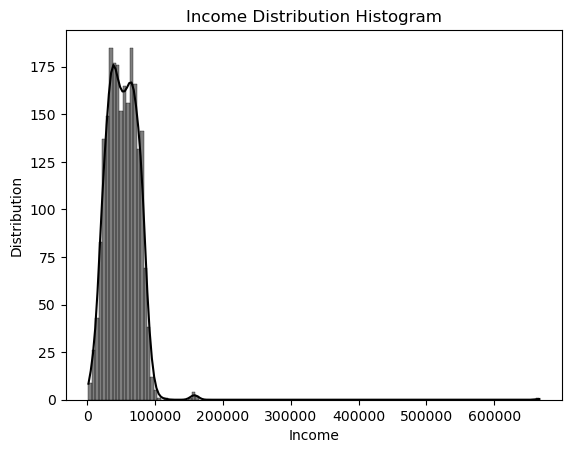

In [7]:
# Visualizing the Income variable to know how sweked the distribution is, this will give us the right treatment to the null values.

In = sns.histplot(df_mkt.Income, kde = True, color='black')
In.set(xlabel='Income' , ylabel='Distribution' , title='Income Distribution Histogram')

In [8]:
# Scaling the Income variable to see percentage of missing values.

#calculting isnull() % for 'Income'
df_mkt[df_mkt['Income'].isnull()].shape[0]* 100 / len(df_mkt)

1.0714285714285714

* From the observations above through histogram visualization, the distribution is bimodal distribution, so it is not highly skewed.
* The percentage of the missing data is relatively small at 1% and also the variable is a numeric variable.
* It is safe to treat our null with average replacement using mean. Because the missing data is missing completely at random.

In [9]:
# To treat the NA values, we will fill these with mean

df_mkt['Income'].fillna(df_mkt['Income'].mean(), inplace=True)

# Need to change Income unit to 1k
df_mkt['Income'] = df_mkt['Income']/1000

In [10]:
# Checking for duplicates 

df_mkt.duplicated().sum()

0

In [11]:
# Checking further to see the unique values of each variable, which might affects the efficiency of classification algorithms.

unique_counts = df_mkt.nunique()

print(unique_counts)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [12]:
# From the unique value above, we will choose the relevant variables we needed for our Classification Machine models.
# Drop constant columns which are Z_CostContact & Z_Revenue.
df_mkt.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Drop User ID & Dt_Customer because they both irrelevant to the model.
df_mkt.drop(['ID', 'Dt_Customer'], axis=1, inplace=True) 

In [13]:
# Change Year_Birth to Age so as to be able to work more easily with our dataset.
df_mkt['Age'] = 2023 - df_mkt.Year_Birth.to_numpy()

# drop Year_Birth as we won't need it anymore since we have the Age variable of each customer.
df_mkt.drop('Year_Birth', axis=1, inplace=True)

### Obervations going forward 
* There are too many values for Education and Marital status which are relevant variables for our classification model.
* This will affect the classification algorithms, so merging some categories of the values.
* First check the value check and merge where necessary.

In [14]:
# Value count for Education
df_mkt['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [15]:
# There are five different values of Education, merging into the three classes of Education 
df_mkt['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

In [16]:
# Value count for Marital Status
df_mkt['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [17]:
# There are too many maritial status. Alone, Adsurd and YOLO will be replaced by Single.

df_mkt['Marital_Status'] = df_mkt['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

#### Checking for Outliers in our numeric variables.
* From the descriptive statistics above, observed an outlier in Income, will visualize Income variable to use graph to determine that outlier.
* Will also visulize the new column 'Age' as that was not included in the descriptive statistics above to ascertain if there is an outlier in there also.

<Axes: xlabel='Age'>

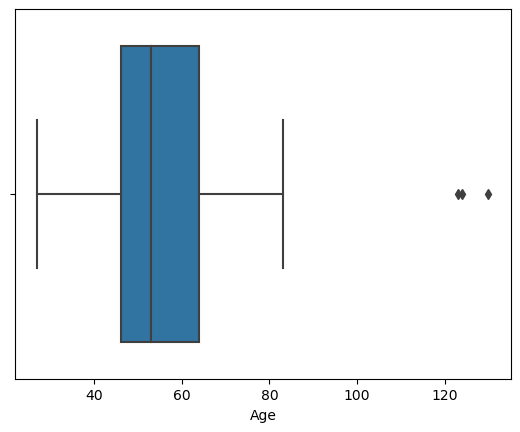

In [18]:
sns.boxplot(x=df_mkt["Age"])

<Axes: xlabel='Income'>

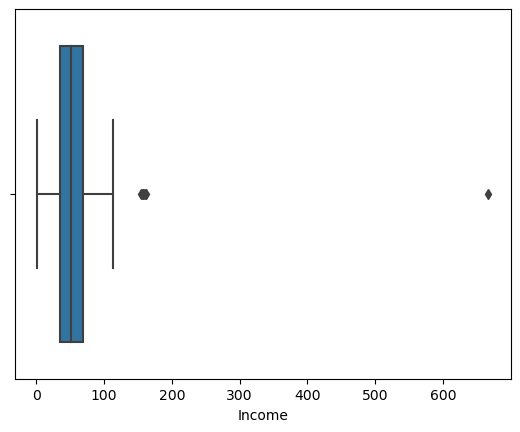

In [19]:
sns.boxplot(x=df_mkt["Income"])

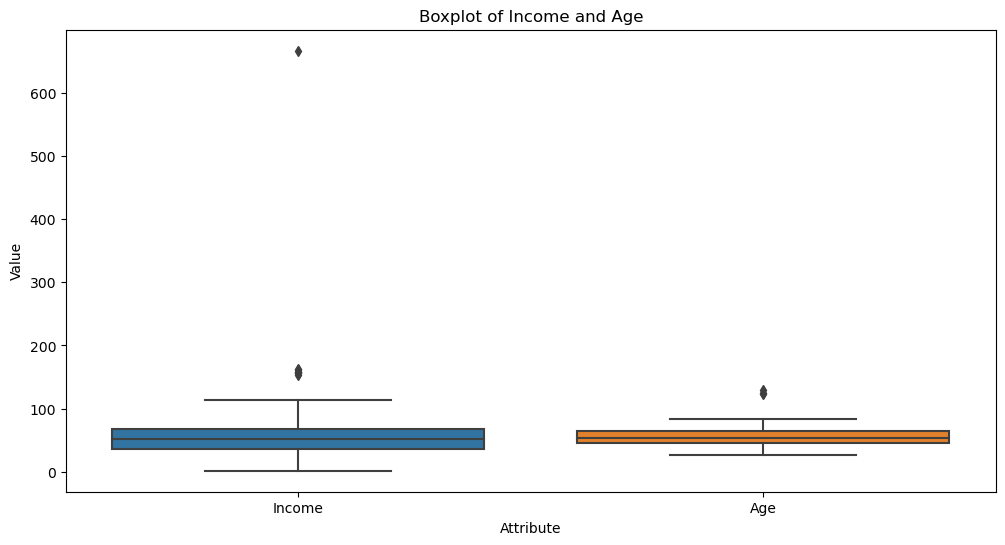

In [20]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mkt[['Income', 'Age']])
plt.title('Boxplot of Income and Age')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.show()

### Observation
* There are outliers in Income and Age. We will treat the outliers by zscores and rectifying the outliers by capping to make sure our values do not go too low or too high to give us more accurate results in our analysis going forward.

In [21]:
from scipy.stats import zscore 

In [22]:
# Removing outliers using Z-score
z_scores = zscore(df_mkt[['Income', 'Age']])
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
df_mkt = df_mkt[~outliers]

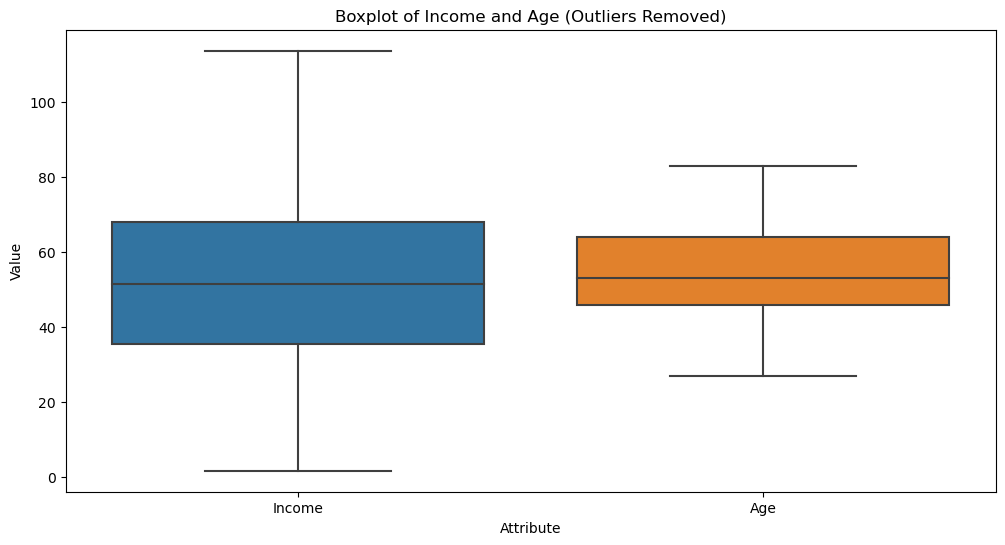

In [23]:
# Visualize outliers removed using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mkt[['Income', 'Age']])
plt.title('Boxplot of Income and Age (Outliers Removed)')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.show()

In [24]:
# Rectify outliers by capping
# Capping outliers in 'Income'
income_cap = df_mkt['Income'].quantile(0.95)
df_mkt.loc[df_mkt['Income'] > income_cap, 'Income'] = income_cap

# Capping outliers in 'Age'
age_cap = df_mkt['Age'].quantile(0.95)
df_mkt.loc[df_mkt['Age'] > age_cap, 'Age'] = age_cap

## Exploratory Analysis

Text(0, 0.5, 'Frequency')

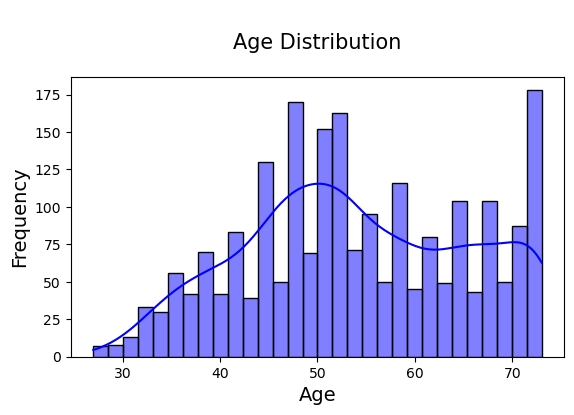

In [25]:
# visualizing Age distribution
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(df_mkt['Age'], bins=30, kde=True, color='blue')
plt.title('\nAge Distribution',pad=20, fontsize=15, color='black')
plt.xlabel('Age', fontsize=14, color="black")
plt.ylabel('Frequency', fontsize=14, color="black")

* From the Distribution above, the age of the customers are mainly centered in their 40s or 70s, the young people under 30s and elderly above 80s are very few.
* These people are at their middle ages or old ages, so their family condition should be further taken care of.

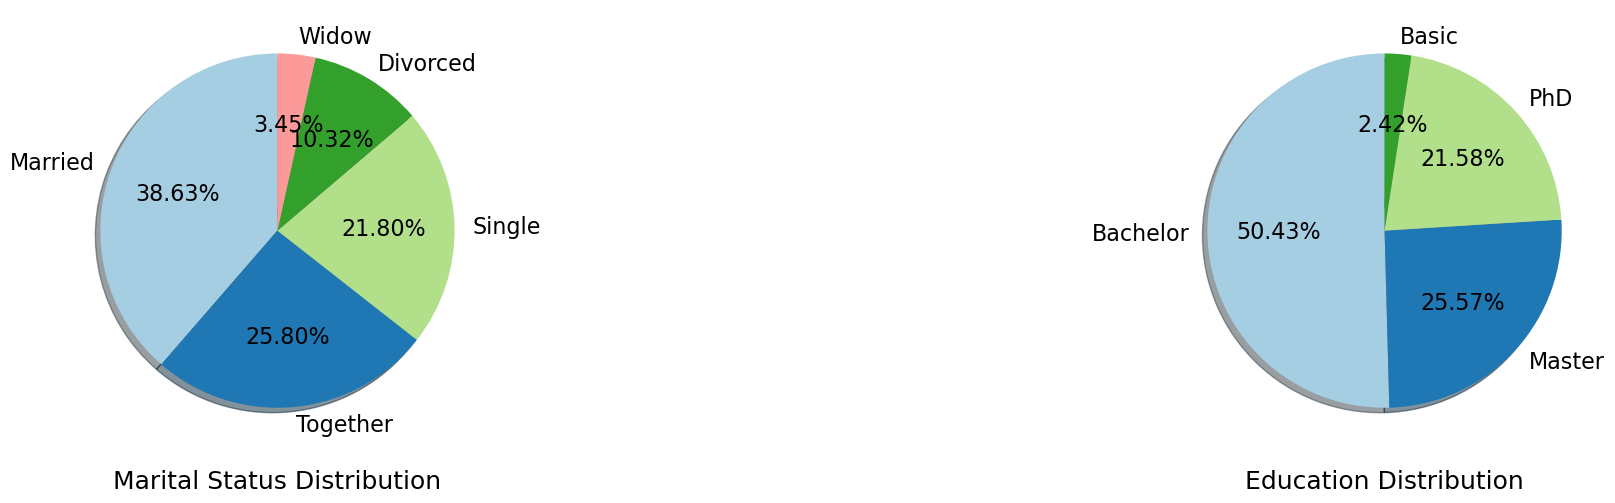

In [26]:
# visualizing Marital Status and Education Level to ascertain our customer distribution


# Count the occurrences of each category
marital_count = df_mkt['Marital_Status'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(1,2, figsize = (20, 18))
ax[0].pie(marital_count, labels=marital_count.index, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 16}, shadow=True, colors=plt.cm.Paired.colors)
ax[0].set_title('Marital Status Distribution', y=-0.1, fontsize=18)

# Count the occurrences of each category
Education_count = df_mkt['Education'].value_counts()

# Create a pie chart
ax[1].pie(Education_count, labels=Education_count.index, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 16}, shadow=True, colors=plt.cm.Paired.colors)
ax[1].set_title('Education Distribution', y=-0.1, fontsize=18)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()


* A quick look of the customer distribution, we could see the most our customer(64%) are in relationships(Married(38.64%) or Together(25.85%)) and most(97%) are at least bachelor degrees with having (PhD(21.69%), Master(25.54%), Bchelor(50.36%))).

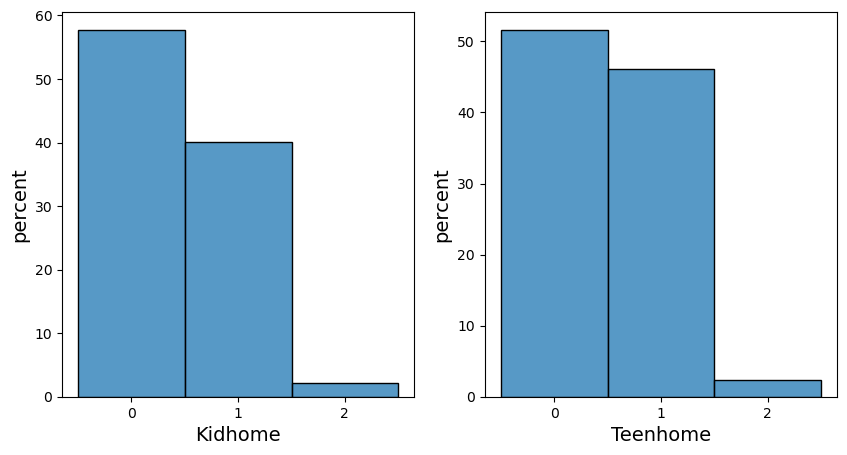

In [27]:
# visualizing to see the distribution of customers with kids and no kid

# Kid Home & Teen Home
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df_mkt, x='Kidhome', stat="percent", discrete=True)
plt.xlabel('Kidhome', fontsize=14, color="black")
plt.ylabel('percent', fontsize=14, color="black")
plt.xticks([0, 1, 2])

plt.subplot(122)
sns.histplot(data=df_mkt, x='Teenhome', stat="percent",discrete=True)
plt.xlabel('Teenhome', fontsize=14, color="black")
plt.ylabel('percent', fontsize=14, color="black")
plt.xticks([0, 1, 2])
plt.show()

* Most customers have 1 kid/Teen or 0 kid/Teen at home, very few have 2 kids/Teens, and no one have kids/Teens over 2.

([<matplotlib.axis.XTick at 0x1c953129c50>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

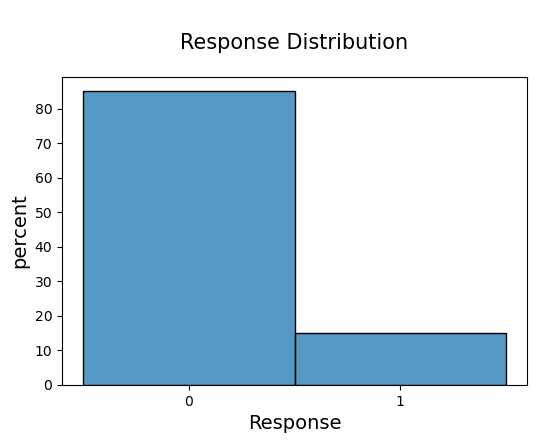

In [28]:
# Checking if our data is balance or unbalance, to ascertain how to treat the dataset, if its unbalance we will use smote

# Response Distribution
plt.figure(figsize=(6,4))
sns.histplot(data=df_mkt, x='Response', stat="percent", discrete=True)
plt.title('\nResponse Distribution',pad=20, fontsize=15, color='black')
plt.xlabel('Response', fontsize=14, color="black")
plt.ylabel('percent', fontsize=14, color="black")
plt.xticks([0, 1])

* According to Response, this is an unbalanced dataset, over 80% customers say no to the last campaign. So we will do a smote analysis to be sure of an accurate prediction.

### Now we want to explore more to know the category of customers that will respond to the marketing campaign.
* Education Response
* Marital Response
* Kid Home Response
* Teen Home Response

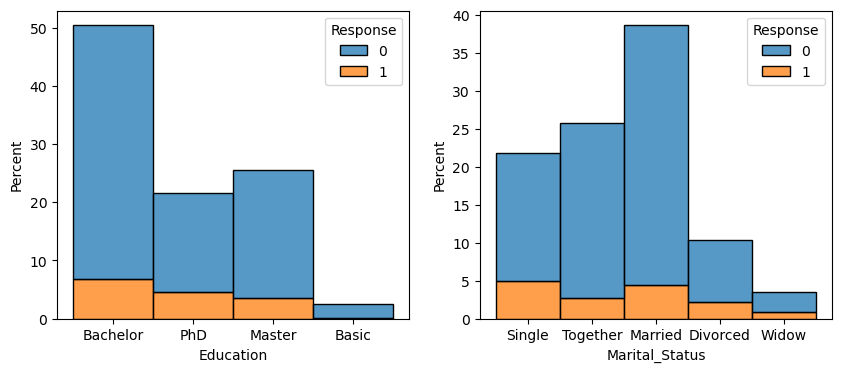

In [29]:
# Education Response
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df_mkt, x="Education", hue="Response", multiple="stack", stat="percent")

# Marital_Status Response
plt.subplot(122)
sns.histplot(data=df_mkt, x="Marital_Status", hue="Response",multiple="stack", stat="percent")
plt.show()

* Campaign acceptance rate in high education groups(Master and PhD) are higher than that in low education groups.
* Single people tend to say yes to the campaign more
* Married people has the highest percent of not responding to the campaign.

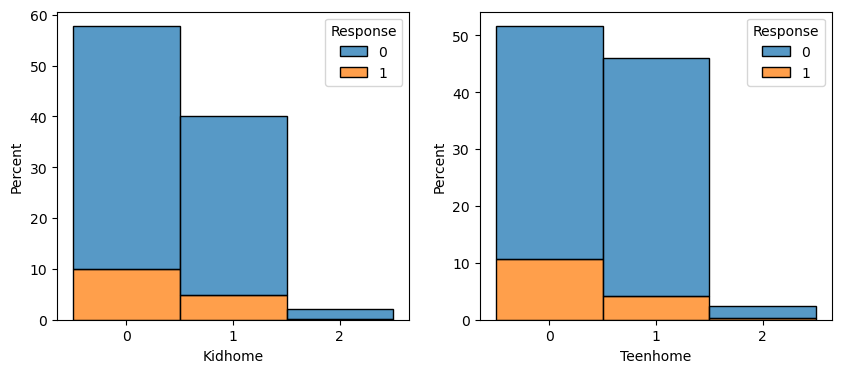

In [30]:
# Kid Home  Response
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df_mkt, x="Kidhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])

# Teen Home  Response
plt.subplot(122)
sns.histplot(data=df_mkt, x="Teenhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])
plt.show()

* Customers with no kids and no teens at home are more likely to accept the offer in this campaign.
* Customers with kids and teens has the higher percentage of not responding to the campaign.

## To further the Exploratory analysis, I want to look at the correlation of Product preferences and purchases and the campaign response

In [31]:
# First need to create a new feature and create column for Product.

# Adding a new feature: Total Purchases
df_mkt['Total_Purchases'] = df_mkt[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                    'MntSweetProducts', 'MntGoldProds', 'MntWines']].sum(axis=1)

# Product Preferences
# Product purchases
product_columns = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntWines']
product_names = ['Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'Wines']

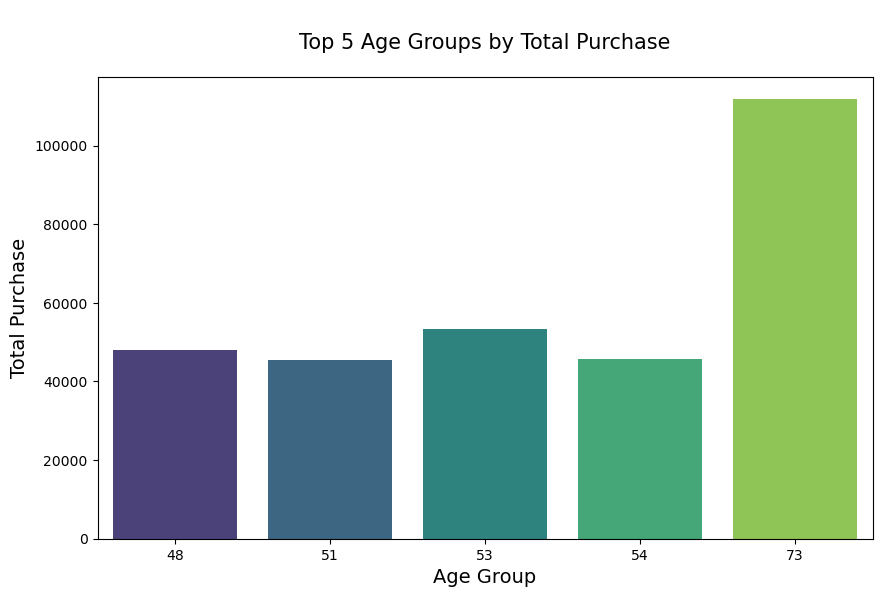

In [32]:
plt.figure(figsize=(10, 6))
top_5_age_groups_purchase = df_mkt.groupby('Age')['Total_Purchases'].sum().nlargest(5)
sns.barplot(x=top_5_age_groups_purchase.index, y=top_5_age_groups_purchase.values, palette='viridis')
plt.title('\nTop 5 Age Groups by Total Purchase', pad=20, fontsize=15, color='black')
plt.xlabel('Age Group', fontsize=14, color='black')
plt.ylabel('Total Purchase', fontsize=14, color='black')
plt.show()

* The Top 5 age group that purchased the products are 48,52,53,54 and 73 years old respectively.
* The customers with the of 73 years has the highest total purchases.
* The reason for doing this analysis is to ascertain if there is a correlation between the age group that purchase the product and the ageo group that responded to the campaign.

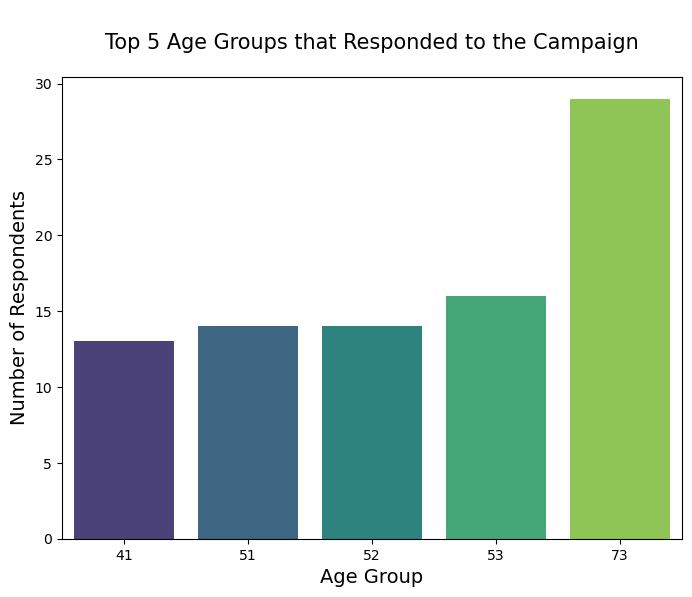

In [33]:
# Visualize top 3 age groups that responded to the campaigndata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3IAAAJVCAYAAACbCcfbAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABhxklEQVR4nO3deVhV5f7+8XvLJCJsEQQkDYfMNNRMyzk0VCzHtEQxckotLTO1/No5FVZqWpkn7Vh6zLn0lFmW5ZiZ5pBZVI6VOQ85gOAUIDy/P/yxjtsNiIjS0vfruvZ1xbM+a63P3iyI22fv9TiMMUYAAAAAANsoVtQNAAAAAAAuD0EOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHABbcDgcl/WoUKFCkfY7btw4dezYUVWqVJHT6ZSPj48iIiLUvXt3bdmy5YqOPW/ePOt5fvDBB4XU8dX366+/6umnn1atWrUUGBgoLy8vlSlTRk2aNNHzzz+v7du3F3WLf0tNmzaVw+HQ7t27r+l5p0+fftk/dwkJCde0x9x6vpw+KlSo4PY8AgICdNddd+n1119Xenr61Wu4AL7++ms5HA716NGjqFsBUMQ8i7oBAMiP7t27u42tWbNGO3fuVK1atXTHHXe4bAsODr5GneVs1KhROn36tGrWrKkaNWpIkrZs2aKZM2dq7ty5+uSTT3TfffcV6NizZs1y+e+uXbsWSs9XizFGCQkJGjlypDIzM1W2bFk1atRITqdTSUlJ+v7777VmzRqNGjVKY8eO1ZAhQ4q6ZUi65ZZbcvy5mzFjhiSpU6dOKlmypMu2i38O8zJ9+nT17NlTL774YpEHQOl/z8cYo927d2vdunX6/vvv9dlnn2nZsmXy9vYu6hYBwAVBDoAtTJ8+3W2sR48e2rlzpzp06PC3+EPwQp9++qnq1Kmj4sWLu4xPmjRJ/fv316OPPqq9e/fKw8Pjso579OhRLVmyxPoDetmyZTpy5IhCQkIKrffC9txzz+nVV19V2bJlNXnyZLVp08Zle1ZWlpYvX64RI0bot99+K6IucbHGjRurcePGbuPZQe71118v8pnvwnTx80lMTFTTpk31zTffaPLkyXriiSeKrjkAyAFvrQSAq6BRo0ZuIU6SHn/8cd1yyy06ePCgduzYcdnH/eCDD3Tu3Dl16tRJHTt21Llz5/7Wb6/csGGDxowZo5IlS2rVqlVuIU6SihUrppYtW2r16tV67LHHiqBLwN0dd9yhwYMHS5I++eSTom0GAHJAkANwXTp+/LieeeYZValSRcWLF1fp0qXVqlUrLV26NMf67M/Vpaen68UXX1TlypVVvHhxVapUSS+88IL++uuvQustexauIG/Vyn5b5cMPP6yHH35YkjR79uw891mxYoXuuece+fn5KSgoSJ06ddJvv/2mhIQEORyOHGc7T506pZdeekk1atRQiRIlFBAQoKioqMv+g/b111+XMUaDBg1SlSpV8qwtVqyY21vzLuzxu+++U5s2bRQUFCSHw6HExESrbtasWWrcuLECAgJUokQJ1axZU6NHj87x+5bXZ852794th8Ohpk2b5trHhg0bFBMTo1KlSikgIEAtWrTQ+vXrc3xOGzZs0AMPPKCIiAj5+PgoLCxMd999t4YPH65Tp07l+XrkZPbs2apTp45KlCihkJAQde/eXQcOHHCpGTBggBwOh6ZMmZLjMYwxqly5sjw8PLRnz57L7iEv69atU/v27VWmTBn5+PioQoUK6t+/vw4ePOhS17RpU/Xs2VOSNGLECJfPp2Vfj8YYffDBB+rSpYtuvfVW+fn5yd/fX3fffbf+/e9/Kysrq1B7z0nt2rUlSfv27bPG8voMbm6f0bvwmnv//fdVv359+fv7q1SpUlaNMUZz5sxRdHS0goKCrN8/cXFx+vbbb3M8X1JSkh5//HGVLVtWPj4+ioyM1HvvvZdj7aJFi9SrVy9Vq1ZNAQEB8vPzU61atTRq1CilpaXluM+SJUsUExOjcuXKycfHR+Hh4WrcuLFGjBiRY/1nn32mmJgYq/9bb71Vzz//fIGudQD5YADAprp3724kmRdffNFlfP/+/aZSpUpGkrn55ptNbGysuffee42Hh4eRZMaNG+d2rOzatm3bGl9fX9OmTRvTsWNH43Q6jSQTHR1tzp07d8U9z5gxw0gyt956q8nMzLysfbdt22YkmfDwcJOZmWkyMzNNeHi4kWS2bduW4z4fffSRKVasmJFkGjVqZLp06WJuueUWU6pUKfPII48YSWbatGku+xw+fNhUr17dSDI33XSTadeunWnevLnx8/Mzkszo0aPz1W9mZqYJCAgwkswvv/xyWc8124svvmgkmZ49exovLy9z++23my5duph77rnH/PTTT8YYY/r27WskmeLFi5v777/fPPjggyY4ONhIMg0aNDBnzpxxOWZUVJSRZHbt2uV2vl27dhlJJioqKsc++vTpY7y9vU316tVNly5dTN26dY0k4+3tbZYuXeqyz+eff26KFStmPDw8zD333GO6dOliYmJiTMWKFXM9f06y+x0wYIBxOBzWsSpUqGAkmXLlypl9+/ZZ9T///LORZO66664cj7d8+XIjybRq1Spf57+YpBz7nzVrlvHw8DAOh8O61m699VYjyYSGhrpco6NHjzaNGjUykkytWrVM9+7drcfq1auNMcacPXvWSDKBgYGmUaNGJjY21kRHR5sSJUoYSaZ79+5uvU2bNi3H3wl5iYiIyPX7MWfOHCPJ1KhRw+X5R0RE5His3M6f/T3s27evKVasmGnSpInp0qWLadSokTHGmHPnzpkHH3zQSDI+Pj4mOjraxMbGmgYNGpjixYu7PNeVK1caSaZ9+/bm1ltvNaGhoaZt27amWbNm1u+4KVOmuPUWGhpqSpYsaerVq2ceeughExMTYwIDA40kc++997r9fps0aZLVT/PmzU3Xrl1N8+bNzU033WRy+vNx8ODB1s/hPffcYzp27Gi9tnXq1DGnTp3K5TsAoKAIcgBsK7cg16ZNGyPJxMfHm/T0dGt89erVpkSJEsbDw8MKAdmy/zgtV66c2blzpzV+5MgRExkZaSSZf/3rX5fd49ixY0337t3Ngw8+aG6//XYriH3//feXfaznnnvOSDJDhgyxxrL/ePrHP/7hVn/ixAlTunRpI8n897//tcbPnTtn+vTpYz3ni4PcfffdZySZZ5991uX127lzp6lcuXKOr19Ofv/9d+sPwcsNrdmyA5QkM2bMGLftH330kRU4f/vtN2s8JSXFNG7c2EgyzzzzjMs+VxLkJJnnnnvOZGVlWdv+/e9/W9/Xs2fPupzH4XDk+L3esGGDSU1NzddrkN2vp6enWbRokTWenp5uunXrZiSZBx54wGWfhg0bGkkmMTHR7XixsbFGkpk/f36+zn+xnILc3r17ja+vr/H09DSfffaZNZ6ZmWkGDRqUY7C8VOjKyMgw8+fPN2lpaS7jR44csQL0qlWrLuuYOckryHXp0sVIMt26dbPGriTIFS9e3Hz99ddu+7388stWYNy9e7fLtuPHj5s1a9ZYX2cHOUmmU6dOLgHpk08+sf5R6mILFixwC1OpqanW78sZM2a4bIuIiDABAQFur0tWVpb56quvXMbmzZtnJJnatWu71Kenp1v/0DJ06FC3ngBcGYIcANvKKcjt3LnTSDIBAQEmOTnZbZ/s4NOvXz+X8ew/jCZPnuy2z5dffmnNol2u6Oho69iSTPny5XP8Q+5SsrKyrD84f/zxR2v8hx9+sP6wvDBcGGPMlClTjCQTExPjdryUlBTj7+/vFuR+/PFHI8k0bNjQ7XjG/O8PxSeffPKSPa9fv95IMmFhYTluX716tctMTPfu3c2jjz7qUpMdoCIjI3Ps55577jGSzNSpU922/fzzz8bhcBh/f3+XMHAlQS4iIsJkZGS47VevXj0jybz//vvWWLVq1UypUqVyfO6XI7vfuLg4t23Hjh0zfn5+plixYmb//v3WePbM7xNPPOFW7+PjY0JDQ11C+uXIKci98MIL1j+eXOyvv/6yZo7XrVtnjRckdGVbtmyZkWQGDx7sMl4YQS4rK8vs3r3bDBs2zEgyDofDfPPNN1b9lQS5AQMGuO2TlpZmSpUqZRwOh9m4ceMl+80OcgEBAeb48eNu22vUqHFZM76//fabkWQ6duzoMu7r62tq1aqVr2PUqlXLSDLbt29323b27FkTFhZmSpUqVeB/0AGQMz4jB+C6smbNGknS/fff7/L5k2zx8fGSpNWrV+e4f5cuXdzGWrVqpcDAQP366686evToZfWzfPlyGWOUnJysb775RlWrVlXTpk01cuTIyzrON998oz179igyMtLlc2S1a9fW7bffrj179ljPPdvatWslSQ899JDb8QICAtSyZUu38WXLlkmS2rdvL4fD4bY9+y6GGzduvGTPxhhJyvE4kvT7779rxowZLo8Ll1a4UNu2bd2Ok5GRofXr18vhcCguLs5tnxo1aqhmzZo6efKkfvrpp0v2mx+dOnWSp6f7DZ+zl4C48HtQp04dnThxQr1799bmzZuv+Nw5XZtBQUFq0aKFsrKyrO+3JHXu3FmlS5fW7NmzdfbsWWt85syZSktLU48ePeTl5XXFPWXL/nnq1q2b2zYfHx/rGszt5y4viYmJGjt2rAYMGKCePXuqR48emjRpkiQV6l1OK1asKIfDoWLFiqlChQoaM2aMvL299fbbb6tJkyaFco527dq5jX3//fc6ceKE7rzzTtWtWzffx6pbt65Kly7tNn7rrbdKkg4dOuS27bffftO//vUvPfnkk+rVq5d69Oihl19+2dp2oTp16uinn37S//3f/2nnzp259nHkyBH99NNPqlatmqpWreq2vXjx4qpbt65OnDjBXWmBQsbyAwCuK9k3VcjtZgTZ4xfffEGSAgMD5e/vn+N+ERERSk5O1sGDB1WmTJnL7qtUqVJq0qSJvvjiCzVo0EDPP/+8WrZsqbvuuitf+194k5OLPfzwwxo+fLhmzZrl8gdn9nMsX758jse8+eab3caybwAybNgwDRs2LNd+jh07dsmes9fyS0pKUlZWlooVc/23wx49ergsapxb4Mut1+PHjys9PV1hYWE53iFUOv/9/umnn3L8fhdERERErueRXK+rUaNG6ZdfftF7772n9957T8HBwWrYsKE6dOiguLg4+fj4XLVzFy9eXI888ojGjx+vjz76yPoHjP/85z9yOBzq3bv3ZZ37Uq7k5y436enp6tGjR553ZT158mS+j3cp2evIORwOlSxZUrfddpseeOABhYeHF9o5crqOs2+kUrly5cs6Vrly5XIcz16a5MIbmBhjNHToUL355pvWP7Bc7OLX8u2331aHDh00ZswYjRkzRuHh4WrSpIkefPBBdezY0fp5zr5hzrZt2/L8GZbO/97IKewBKBiCHIDrUm5/UGSPX+oPjovl9sfP5fLy8lJsbKw2bdqkzz77LF9B7q+//tJHH30kSZozZ44+++wzl+2pqamSpA8//FATJkxwCwi5PdecnlNmZqYkqUmTJqpUqVKuPeVnwfWKFSsqICBAqamp2rp1qyIjIy+5T25yC2pS/r6X+f1+F/ROiDm9luXLl9f333+vr776Sp9//rlWrVqlzz77TAsXLtTYsWO1du1aBQYGFuh8lzq3JD322GMaP368/vOf/yg+Pl5r167V1q1b1axZs0veQbSgLvU6X87P3bhx4/TBBx8oMjJSr732mu68804FBgbKy8tLv/76q6pWrVpoP5dS4ayLd6nr50qv44LWz5s3T+PGjVO5cuU0fvx4NWjQQGXKlJGXl5fS09Pl4+Pj9lrWrFlTW7du1eLFi/XFF19o1apVmjdvnubNm6fGjRtrxYoV8vb2tn5nlC1bNsdZ/gsFBQVd1nMEkDeCHIDrSva/nu/atSvH7dkzTmXLlnXblpycrJMnT+Y4K7d3795c97tc2SEov2/TXLhwoVJSUiRJv/zyS651J06c0Oeff65OnTpJ+l+v2b1f7MJbqmfL/lf+Bx98UAMHDsxXf7nx8PBQixYtNH/+fM2bN++KglxOgoKC5O3trcOHD+vs2bPy9fV1q8meLbjw+5a97ENOt0TP6TXJ6XgXy36NL5698fT0VMuWLa0/cPfu3auePXvqq6++0quvvqoxY8bkeb6Lz12zZs18nzv7bbxff/21duzYYS1H0KdPn3yfM7/Cw8O1Y8cO7dq1y3pr38W9S5f387NgwQJJssLchf74448r6PbKeHl55Xo7/UtdPznJnjH//fffr6ivvGS/lpMmTXJbyzGv17J48eLq0KGDOnToIEnaunWrunbtqjVr1mjq1Kl6/PHHrd8ZYWFhOS5lAuDq4TNyAK4r2Z/hWrRokU6cOOG2PXvNtdw+8zJv3jy3sSVLlig5OVlVqlRRSEjIFfe4atUqSfl/K1X22yrffvttmfM3qXJ7TJ48WZLrmnINGzaUJGs270KpqanW5+Eu1Lx5c0mFtwDykCFDJEnjx48v9M/HeHl5qX79+tZ6YxfbvHmzfvrpJ/n7+6tWrVrWeHaY+PXXX932yW2dwWzz58+3ZiAuNHfuXEnnF4LPy80332y9ZTWvUJ6TnK7NpKQkLV26VA6HQw0aNHDb3q9fP0nnZ7f++9//qnTp0urYseNlnTc/sn+e5syZ47YtPT1dH374oUud9L9Afe7cuRyPmZycLCnntwb/97//vbKGr0DZsmV1/PhxJSUluW271PWTk7p166pUqVL64YcftGnTpsJo0U1hvZbVq1fXgAEDJP3v+i1XrpyqVq2qn3/+Odd/QANwdRDkAFxXKlWqpNatW+vkyZN66qmnlJGRYW1bt26dJk2aJA8PD/Xv3z/H/V966SWXhaKPHTumZ599VpJy3ediq1ev1rx589z+QM3IyNCECRM0a9Ys+fr6KjY29pLHOnbsmJYsWSIPDw89+OCDudZ16tRJXl5e+uKLL6w/MB966CEFBgZq8eLFmj9/vlWblZWlYcOGWW/JvFD9+vUVHR2tlStX6umnn3abecjKytLSpUvdbqySmwYNGmjo0KE6deqUoqKi9Pnnn7vVGGNyDJX58eSTT0qSXnzxRZeZhZMnT+qJJ56QMUb9+vVzWXw9KipKkvTGG2/ozJkz1vjy5cs1fvz4PM+3Z88et8WQJ0+erHXr1iksLEwPPPCANf7mm2/qzz//dDvG4sWLJeX8eam8/Pe//9WSJUusr8+dO6enn35ap0+fVrt27XL8zFTHjh1VpkwZTZ48WWfOnNEjjzxy2Z/Ny4/evXvL19dXH3zwgRYtWmSNZ2Vl6bnnntOBAwd01113qX79+ta27BnEHTt25HjM7Jm9d955x2X8o48+0syZMwv7KeRb9vWTfZMQ6fw1PHr0aJcbzuSXt7e3nn76aRlj1Lt3b7dZvaSkpFwXBM+v7Ndy8uTJLm+hXL16tV577TW3+jNnzuitt95y+8ew7J9/yfX6/ec//6nMzEx16tQpxxv77Ny5M9eFygFcgWt5i0wAKEx5LQievehyRESE6dKli4mOjrYWy33jjTfcjqX/v/ZSmzZtTIkSJUzbtm1Nx44dTalSpYwk06xZsxxvO5+T7FuQBwcHm5iYGBMXF2datmxpypYta60lNW/evHwd66233sp1CYGL3X///UaSmTRpkjU2b948a0Hwxo0bm65du5oqVaoYp9NpHn74YSPJzJkzx+U4hw8fNjVr1jSSTOnSpc29995rYmNjTePGjU2ZMmWMJPPmm2/mq39jzt/O/bnnnrP6KFu2rGnTpo2Ji4szLVq0sG7/7nA4TK9evVz2zb7t/8Vr3V0oe50qX19f07p1a/PQQw9ZfdavX9+cPn3apf7MmTOmatWq1ve8U6dO5u677zbFihUzQ4cOzXP5gT59+lgLk3ft2tXcddddRpLx8vIyX375pcs+TqfTFCtWzNSuXdt07tzZPPTQQ9Z5g4ODze+//56v1+/iBcGjoqJM165drWs8PDzc7NmzJ9f9n332WWvJgM2bN+frnHnJPlZeC4JnX2vZz/fiBcGNOX9b+pCQEOv17tmzp+ndu7f59ttvjTHGrFq1yvqZrVOnjunatau1flxu36fCXkcuJ5s3bza+vr5GkrnjjjtMp06dzK233mp8fX1N//7981x+ILdzZGRkmA4dOhjpfwtwd+nSxTRs2DDXBcFzWhDdmP/9Xly5cqU1tmPHDuPn52ckWYvZN2nSxDgcDuu1vHBJheTkZCOdX+i+fv36pkuXLqZjx47m5ptvNpJMpUqVTFJSkst5s68zDw8PU7duXWvR8dtuu81IyvdSBgDyjyAHwLZyC3LGnF8va8iQIaZy5crG29vblCpVyrRs2dIsWbIkx2Nl/yHz119/meeee85UqFDBeHt7m4iICPOPf/zDnDlzJt99/fHHH+a5554zjRo1MmXLljVeXl7Gz8/P3H777ebJJ590Wbj6UrKDQl5BJtusWbOsNeAutHTpUtO4cWPj6+trSpUqZdq3b2+2b99uHn30USPJLF682O1YZ86cMePGjTP16tUz/v7+xsfHx1SoUMG0bNnSvP322+bo0aP5fg7Ztm7dagYOHGgiIyNNQECA8fT0NEFBQaZhw4Zm+PDhbn/oG5O/IGeMMTNnzjQNGzY0JUuWNMWLFze33367GTlyZK7ft/3795uuXbuawMBA4+vra+rWrWs+/PDDS64jN23aNLN27VoTHR1t/P39TcmSJU10dLQVPi7uKS4uzlStWtX4+/sbf39/U716dTN06FBz8ODBfL9uF4aA6dOnmzvuuMMUL17cBAUFmfj4eLNv374891+yZEmO10VB5RbkjDHm22+/NW3btjVBQUHGy8vL3Hzzzebxxx93WePuQhs3bjQtWrQwTqfTOBwOt+/1unXrzL333msCAwONv7+/adiwoZk/f36u36drEeSy+2ratKkpUaKECQgIMPfdd59JTEy85DpyeZ0jMzPTvPfee6Zx48YmICDAFC9e3FSsWNF069bNrF271qorSJAz5vzPX9u2bU1ISIgpUaKEqV27trVu5sVBLiMjw7z99tumY8eOpnLlyqZEiRKmVKlSplatWubll1/OcY1OY4xZsWKFeeCBB0xYWJjx8vIyISEh5s477zTPPPOM2bRpU67PHUDBOIwpxFs+AYBNORwORUREuLyt8nqWlZWlmjVrasuWLTp06JDCwsKKuqW/tYSEBI0YMULTpk1zWTLBDvr27aspU6bYsncAQO74jBwAXMcOHDigI0eOuIxlZGRo+PDh2rJli+69915C3HVsz549mj17toKDg/P1mUwAgH2w/AAAXMdWr16thx9+WHfeeaciIiJ0+vRpa4Hs0qVLa8KECUXdIq6C1157TT///LOWLVums2fP6tVXX81xeQYAgH0xIwcA17E6deooPj5eSUlJWrx4sbWIb9++fbVp0yZVr169qFvEVbBo0SLNnj1bnp6eGjFihHV3TwDA9YPPyAEAAACAzTAjBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGc+ibgBSVlaWDh48KH9/fzkcjqJuBwAAAEARMcbo5MmTCg8PV7Fiuc+7EeT+Bg4ePKjy5csXdRsAAAAA/ib27duncuXK5bqdIPc34O/vL+n8NysgIKCIuwEAAABQVFJTU1W+fHkrI+SGIPc3kP12yoCAAIIcAAAAgEt+5IqbnQAAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDOeRd0AAAAAcL0b/21sUbeAa2hQo3lX/RzMyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzfztgtw333yjtm3bKjw8XA6HQ5988onLdmOMEhISFB4eLl9fXzVt2lRbtmxxqUlLS9OTTz6p4OBg+fn5qV27dtq/f79LTXJysuLj4+V0OuV0OhUfH68TJ0641Ozdu1dt27aVn5+fgoODNXDgQKWnp7vU/PLLL4qKipKvr69uuukmvfTSSzLGFNrrAQAAAAAX+9sFudOnT6tWrVqaOHFijtvHjh2rcePGaeLEidq4caPCwsLUokULnTx50qoZNGiQFixYoLlz52rNmjU6deqU2rRpo8zMTKsmLi5OiYmJWrx4sRYvXqzExETFx8db2zMzM9W6dWudPn1aa9as0dy5czV//nwNGTLEqklNTVWLFi0UHh6ujRs3asKECXr99dc1bty4q/DKAAAAAMB5DvM3nj5yOBxasGCBOnToIOn8bFx4eLgGDRqkYcOGSTo/+xYaGqoxY8aoX79+SklJUZkyZTRr1izFxsZKkg4ePKjy5cvriy++UExMjLZt26bq1atr/fr1qlevniRp/fr1atCggbZv366qVavqyy+/VJs2bbRv3z6Fh4dLkubOnasePXroyJEjCggI0KRJkzR8+HD9+eef8vHxkSS9+uqrmjBhgvbv3y+Hw5Gv55mamiqn06mUlBQFBAQU5ksIAACAv4Hx38YWdQu4hgY1mlfgffObDf52M3J52bVrlw4fPqyWLVtaYz4+PoqKitLatWslSZs2bVJGRoZLTXh4uCIjI62adevWyel0WiFOkurXry+n0+lSExkZaYU4SYqJiVFaWpo2bdpk1URFRVkhLrvm4MGD2r17d+G/AAAAAAAgmwW5w4cPS5JCQ0NdxkNDQ61thw8flre3twIDA/OsCQkJcTt+SEiIS83F5wkMDJS3t3eeNdlfZ9fkJC0tTampqS4PAAAAAMgvWwW5bBe/ZdEYc8m3MV5ck1N9YdRkv1M1r35Gjx5t3WTF6XSqfPnyefYOAAAAABeyVZALCwuT5D7bdeTIEWsmLCwsTOnp6UpOTs6z5s8//3Q7/tGjR11qLj5PcnKyMjIy8qw5cuSIJPdZwwsNHz5cKSkp1mPfvn15P3EAAAAAuICtglzFihUVFhamZcuWWWPp6elatWqVGjZsKEmqU6eOvLy8XGoOHTqkzZs3WzUNGjRQSkqKvvvuO6tmw4YNSklJcanZvHmzDh06ZNUsXbpUPj4+qlOnjlXzzTffuCxJsHTpUoWHh6tChQq5Pg8fHx8FBAS4PAAAAAAgv/52Qe7UqVNKTExUYmKipPM3OElMTNTevXvlcDg0aNAgjRo1SgsWLNDmzZvVo0cPlShRQnFxcZIkp9Op3r17a8iQIVqxYoV+/PFHPfzww6pRo4aaN28uSapWrZpatWqlPn36aP369Vq/fr369OmjNm3aqGrVqpKkli1bqnr16oqPj9ePP/6oFStWaOjQoerTp48VvOLi4uTj46MePXpo8+bNWrBggUaNGqXBgwfn+46VAAAAAHC5PIu6gYt9//33atasmfX14MGDJUndu3fX9OnT9eyzz+rs2bPq37+/kpOTVa9ePS1dulT+/v7WPm+++aY8PT3VuXNnnT17VtHR0Zo+fbo8PDysmjlz5mjgwIHW3S3btWvnsnadh4eHFi1apP79+6tRo0by9fVVXFycXn/9davG6XRq2bJlGjBggOrWravAwEANHjzY6hkAAAAAroa/9TpyNwrWkQMAALi+sY7cjYV15AAAAAAAbghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYDEEOAAAAAGyGIAcAAAAANkOQAwAAAACbIcgBAAAAgM0Q5AAAAADAZghyAAAAAGAzBDkAAAAAsBmCHAAAAADYjO2C3Llz5/TPf/5TFStWlK+vrypVqqSXXnpJWVlZVo0xRgkJCQoPD5evr6+aNm2qLVu2uBwnLS1NTz75pIKDg+Xn56d27dpp//79LjXJycmKj4+X0+mU0+lUfHy8Tpw44VKzd+9etW3bVn5+fgoODtbAgQOVnp5+1Z4/AAAAANguyI0ZM0bvvPOOJk6cqG3btmns2LF67bXXNGHCBKtm7NixGjdunCZOnKiNGzcqLCxMLVq00MmTJ62aQYMGacGCBZo7d67WrFmjU6dOqU2bNsrMzLRq4uLilJiYqMWLF2vx4sVKTExUfHy8tT0zM1OtW7fW6dOntWbNGs2dO1fz58/XkCFDrs2LAQAAAOCG5DDGmKJu4nK0adNGoaGhmjp1qjXWqVMnlShRQrNmzZIxRuHh4Ro0aJCGDRsm6fzsW2hoqMaMGaN+/fopJSVFZcqU0axZsxQbGytJOnjwoMqXL68vvvhCMTEx2rZtm6pXr67169erXr16kqT169erQYMG2r59u6pWraovv/xSbdq00b59+xQeHi5Jmjt3rnr06KEjR44oICAgX88pNTVVTqdTKSkp+d4HAAAA9jH+29iibgHX0KBG8wq8b36zge1m5Bo3bqwVK1bo119/lST99NNPWrNmje6//35J0q5du3T48GG1bNnS2sfHx0dRUVFau3atJGnTpk3KyMhwqQkPD1dkZKRVs27dOjmdTivESVL9+vXldDpdaiIjI60QJ0kxMTFKS0vTpk2bcn0OaWlpSk1NdXkAAAAAQH55FnUDl2vYsGFKSUnRbbfdJg8PD2VmZmrkyJHq2rWrJOnw4cOSpNDQUJf9QkNDtWfPHqvG29tbgYGBbjXZ+x8+fFghISFu5w8JCXGpufg8gYGB8vb2tmpyMnr0aI0YMeJynjYAAAAAWGw3Izdv3jzNnj1b77//vn744QfNmDFDr7/+umbMmOFS53A4XL42xriNXezimpzqC1JzseHDhyslJcV67Nu3L8++AAAAAOBCtpuRe+aZZ/R///d/6tKliySpRo0a2rNnj0aPHq3u3bsrLCxM0vnZsrJly1r7HTlyxJo9CwsLU3p6upKTk11m5Y4cOaKGDRtaNX/++afb+Y8ePepynA0bNrhsT05OVkZGhttM3YV8fHzk4+NTkKcPAAAAAPabkTtz5oyKFXNt28PDw1p+oGLFigoLC9OyZcus7enp6Vq1apUV0urUqSMvLy+XmkOHDmnz5s1WTYMGDZSSkqLvvvvOqtmwYYNSUlJcajZv3qxDhw5ZNUuXLpWPj4/q1KlTyM8cAAAAAM6z3Yxc27ZtNXLkSN188826/fbb9eOPP2rcuHHq1auXpPNvdRw0aJBGjRqlKlWqqEqVKho1apRKlCihuLg4SZLT6VTv3r01ZMgQBQUFqXTp0ho6dKhq1Kih5s2bS5KqVaumVq1aqU+fPnr33XclSX379lWbNm1UtWpVSVLLli1VvXp1xcfH67XXXlNSUpKGDh2qPn36cPdJAAAAAFeN7YLchAkT9Pzzz6t///46cuSIwsPD1a9fP73wwgtWzbPPPquzZ8+qf//+Sk5OVr169bR06VL5+/tbNW+++aY8PT3VuXNnnT17VtHR0Zo+fbo8PDysmjlz5mjgwIHW3S3btWuniRMnWts9PDy0aNEi9e/fX40aNZKvr6/i4uL0+uuvX4NXAgAAAMCNynbryF2PWEcOAADg+sY6cjcW1pEDAAAAALghyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2UyhBLikpSfv27SuMQwEAAAAALqHAQS4lJUVPPfWUQkNDVaZMGVWsWNHatmHDBt1///3atGlToTQJAAAAAPifAgW5pKQk1atXTxMmTFD58uVVrVo1GWOs7TVr1tS3336rOXPmFFqjAAAAAIDzChTkEhIS9Ouvv+qDDz7Q999/r4ceeshlu6+vr6KiovTVV18VSpMAAAAAgP8pUJBbuHCh2rRpo9jY2FxrIiIitH///gI3BgAAAADIWYGC3KFDh1S9evU8a4oXL67Tp08XqCkAAAAAQO4KFOSCgoIueZfK7du3q2zZsgVqCgAAAACQuwIFuXvuuUcLFy7UgQMHcty+detWLV68WM2bN7+i5gAAAAAA7goU5P7xj3/o3LlzatSokd5//30dO3ZMkrRt2zZNnTpV9957r3x8fPTMM88UarMAAAAAAMmzIDvVqFFD8+bN0yOPPKL4+HhJkjFGkZGRMsbI399f//3vf1WlSpVCbRYAAAAAUMAgJ0nt2rXTH3/8oRkzZmjDhg1KSkpSQECA6tWrp549eyo4OLgw+wQAAAAA/H8FDnKSVLp0aT399NOF1QsAAAAAIB8K9Bm53Bhj9Ntvv7F+HAAAAABcRQUKcp9++ql69eql5ORka2z37t2qUaOGbrvtNkVERKhbt27KysoqtEYBAAAAAOcVKMi988472rhxowIDA62xQYMGaevWrWrWrJlq1qypuXPnatq0aYXWKAAAAADgvAIFuS1btujuu++2vk5JSdEXX3yh2NhYLV++XN99952qVaumqVOnFlqjAAAAAIDzChTkjh49qrJly1pfr1mzRufOnVPXrl0lSV5eXmrRooV+//33wukSAAAAAGApUJALCAjQ8ePHra+//vprFStWTE2aNLHGvLy8dPr06SvvEAAAAADgokBB7rbbbtNnn32mpKQkpaSkaO7cubrzzjtdPjO3Z88ehYaGFlqjAAAAAIDzChTkBg4cqIMHD+qmm25S+fLldfDgQT322GPW9szMTK1Zs0a1atUqtEYBAAAAAOcVaEHwTp066e2337ZuZtK5c2f16tXL2r5ixQqdOXNGrVq1KpwuAQAAAAAWhzHGFHUTN7rU1FQ5nU6lpKQoICCgqNsBAABAIRv/bWxRt4BraFCjeQXeN7/ZoEBvrQQAAAAAFJ0CvbXyQvv27dPBgweVlpaW4/Z77rnnSk8BAAAAALhAgYPcZ599pmeeeUa//fZbnnWZmZkFPQUAAAAAIAcFemvl119/rQceeECnTp3SE088IWOM7rnnHvXt21fVq1eXMUatW7fWCy+8UNj9AgAAAMANr0BB7tVXX1XJkiW1adMm/etf/5IkNWvWTJMmTdLPP/+skSNHasWKFWrfvn2hNgsAAAAAKGCQ27hxozp06OCy4HdWVpYkyeFwaPjw4apduzYzcgAAAABwFRQoyJ05c0Y33XST9bWPj49SU1NdaurXr69vv/32yroDAAAAALgpUJALCwvT0aNHra9vuukmbdmyxaXm+PHj3OgEAAAAAK6CAgW5WrVqafPmzdbXzZo108qVKzV37lydPn1aS5Ys0bx581SzZs1CaxQAAAAAcF6Bgly7du2UmJioPXv2SJKee+45lSxZUt26dVNAQIDuv/9+ZWZm6pVXXinUZgEAAAAABVxHrlevXurVq5f1dcWKFbVx40aNGzdOf/zxhyIiIvTYY4/pjjvuKKw+AQAAAAD/X4EXBL9Y5cqV9fbbbxfW4QAAAAAAuSjQWysBAAAAAEXnimbkvvvuO23cuFEnTpzI8Q6VDodDzz///JWcAgAAAABwkQIFuaSkJHXo0EHffvutjDG51hHkAAAAAKDwFSjIDR48WGvWrFHTpk3VvXt3lStXTp6ehfZxOwAAAABAHgqUvj7//HPdfffdWrFihRwOR2H3BAAAAADIQ4FudvLXX3/pnnvuIcQBAAAAQBEoUJCrXbu2du/eXcitAAAAAADyo0BBLiEhQQsXLtT69esLux8AAAAAwCXk6zNyM2fOdBtr06aNoqKi1K1bN9WuXVtOpzPHfR955JEr6xAAAAAA4MJh8lo/4P8rVqyY2+fhLt4tp+0OhyPH9eXgKjU1VU6nUykpKQoICCjqdgAAAFDIxn8bW9Qt4Boa1GhegffNbzbI14zctGnTCtwIAAAAAKBw5SvIde/e/Wr3AQAAAADIpwLd7AQAAAAAUHQKFOQ+//xzdezYUQcPHsxx+8GDB9WxY0d9+eWXV9QcAAAAAMBdgYLc22+/rZ07dyo8PDzH7eHh4dq1a5fefvvtK2oOAAAAAOCuQEHup59+Ur169fKsqVevnhITEwtyeAAAAABAHgoU5JKSkhQSEpJnTXBwsI4dO1agpgAAAAAAuStQkCtTpox27NiRZ82OHTtUunTpAjUFAAAAAMhdgYJcVFSUPvvsM/388885bv/pp5+0cOFCRUVFXVFzAAAAAAB3BQpyw4YNk8PhUOPGjfXSSy9p3bp12rt3r9atW6cRI0aoSZMmKlasmIYPH17Y/QIAAADADS9fC4JfrEaNGnr//ff1yCOPaMSIERoxYoS1zRijkiVL6oMPPlDNmjULrVEAAAAAwHkFCnKS9MADD+iPP/7Q9OnTtXHjRp04cUKlSpXS3Xffre7du6tMmTKF2ScAAAAA4P8rUJCbOXOmQkNDFRMTo2eeeaawewIAAAAA5KFAn5Hr3bu3lixZUti9AAAAAADyoUBBrmzZskpPTy/sXgAAAAAA+VCgINehQwctW7ZMaWlphd0PAAAAAOASChTkXn75ZZUsWVIPPPCAtmzZUtg9XdKBAwf08MMPKygoSCVKlNAdd9yhTZs2WduNMUpISFB4eLh8fX3VtGlTtz7T0tL05JNPKjg4WH5+fmrXrp3279/vUpOcnKz4+Hg5nU45nU7Fx8frxIkTLjV79+5V27Zt5efnp+DgYA0cOJDZSgAAAABXVYGCXO3atXX48GEtWbJENWvWlJ+fnypWrKhKlSq5PCpXrlzY/So5OVmNGjWSl5eXvvzyS23dulVvvPGGSpUqZdWMHTtW48aN08SJE7Vx40aFhYWpRYsWOnnypFUzaNAgLViwQHPnztWaNWt06tQptWnTRpmZmVZNXFycEhMTtXjxYi1evFiJiYmKj4+3tmdmZqp169Y6ffq01qxZo7lz52r+/PkaMmRIoT9vAAAAAMjmMMaYy92pQoUKcjgc+ardtWvXZTeVl//7v//Tt99+q9WrV+e43Rij8PBwDRo0SMOGDZN0fvYtNDRUY8aMUb9+/ZSSkqIyZcpo1qxZio2NlSQdPHhQ5cuX1xdffKGYmBht27ZN1atX1/r161WvXj1J0vr169WgQQNt375dVatW1Zdffqk2bdpo3759Cg8PlyTNnTtXPXr00JEjRxQQEJCv55Samiqn06mUlJR87wMAAAD7GP9tbFG3gGtoUKN5Bd43v9mgQDNyu3fv1q5du/L1KGwLFy5U3bp19dBDDykkJES1a9fWlClTrO27du3S4cOH1bJlS2vMx8dHUVFRWrt2rSRp06ZNysjIcKkJDw9XZGSkVbNu3To5nU4rxElS/fr15XQ6XWoiIyOtECdJMTExSktLc3mr58XS0tKUmprq8gAAAACA/CpQkCtKf/zxhyZNmqQqVapoyZIleuyxxzRw4EDNnDlTknT48GFJUmhoqMt+oaGh1rbDhw/L29tbgYGBedaEhIS4nT8kJMSl5uLzBAYGytvb26rJyejRo63P3TmdTpUvX/5yXgIAAAAANzjbBbmsrCzdeeedGjVqlGrXrq1+/fqpT58+mjRpkkvdxW/9NMZc8u2gF9fkVF+QmosNHz5cKSkp1mPfvn159gUAAAAAF/IsyE69evXKV53D4dDUqVMLcopclS1bVtWrV3cZq1atmubPny9JCgsLk3R+tqxs2bJWzZEjR6zZs7CwMKWnpys5OdllVu7IkSNq2LChVfPnn3+6nf/o0aMux9mwYYPL9uTkZGVkZLjN1F3Ix8dHPj4++X7OAAAAAHChAgW56dOn57nd4XBYs1KFHeQaNWqkHTt2uIz9+uuvioiIkCRVrFhRYWFhWrZsmWrXri1JSk9P16pVqzRmzBhJUp06deTl5aVly5apc+fOkqRDhw5p8+bNGjt2rCSpQYMGSklJ0Xfffae7775bkrRhwwalpKRYYa9BgwYaOXKkDh06ZIXGpUuXysfHR3Xq1CnU5w0AAAAA2QoU5HK7iUlKSop++OEHjRw5UrVr17ZCUWF6+umn1bBhQ40aNUqdO3fWd999p8mTJ2vy5MmSzofIQYMGadSoUapSpYqqVKmiUaNGqUSJEoqLi5MkOZ1O9e7dW0OGDFFQUJBKly6toUOHqkaNGmrevLmk87N8rVq1Up8+ffTuu+9Kkvr27as2bdqoatWqkqSWLVuqevXqio+P12uvvaakpCQNHTpUffr04e6TAAAAAK6aAgW57NmvnNSsWVP33XefatSooUWLFmnAgAEFbi4nd911lxYsWKDhw4frpZdeUsWKFTV+/Hh169bNqnn22Wd19uxZ9e/fX8nJyapXr56WLl0qf39/q+bNN9+Up6enOnfurLNnzyo6OlrTp0+Xh4eHVTNnzhwNHDjQurtlu3btNHHiRGu7h4eHFi1apP79+6tRo0by9fVVXFycXn/99UJ9zgAAAABwoQKtI5cfvXv31tq1a7Vt27arcfjrCuvIAQAAXN9YR+7G8rddRy4//P39tXv37qt1eAAAAAC4YV2VIHfixAl9+umned65EQAAAABQMAX6jNxLL72U4/i5c+d04MABLVy4UElJSXrhhReuqDkAAAAAgLsCBbmEhIQ8t5csWVLDhg0jyAEAAADAVVCgILdy5cocx4sVK6bAwEBVrVpVXl5eV9QYAAAAACBnBQpyUVFRhd0HAAAAACCfLutmJ3/88Yd69+6tmjVrqmbNmnr00Uf1xx9/XK3eAAAAAAA5yPeM3J49e3T33XcrOTlZ2UvPbd68WQsXLtSmTZtUvnz5q9YkAAAAAOB/8j0jN3LkSCUlJenhhx/W+vXrtX79enXr1k3Hjh3TqFGjrmaPAAAAAIAL5HtGbsWKFbrjjjs0Y8YMa2zWrFnavHmzli1bdlWaAwAAAAC4y/eM3MGDB9W0aVO38WbNmunAgQOF2RMAAAAAIA/5DnJpaWkqVaqU27jT6VR6enph9gQAAAAAyMNl3bUSAAAAAFD0Lmsduc8//1yHDx92Gfv+++8lSf3793erdzgcevvtt6+gPQAAAADAxRwmey2BSyhW7PIn7xwOhzIzMy97vxtNamqqnE6nUlJSFBAQUNTtAAAAoJCN/za2qFvANTSo0bwC75vfbJDvGbmVK1cWuBkAAAAAQOHJd5CLioq6mn0AAAAAAPKJm50AAAAAgM0Q5AAAAADAZi7rrpUAAFwLd7ySUNQt4BpK/GdCUbcAALbDjBwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDN5OuulZUqVSrQwR0Oh3bu3FmgfQEAAAAAOctXkMvKypLD4bjsgxtjLnsfAAAAAEDe8hXkdu/efZXbAAAAAADkF5+RAwAAAACbIcgBAAAAgM3k662Vudm/f79WrlypgwcPKi0tzW27w+HQ888/fyWnAAAAAABcpMBB7plnntG//vUvZWZmWmPGGOumKNn/TZADAAAAgMJVoLdWTpkyRW+88YaaNWumjz76SMYYde/eXR988IEee+wxeXp66sEHH9RXX31V2P0CAAAAwA2vQDNykydPVoUKFfTll1+qWLHzWbBChQqKjY1VbGysOnfurBYtWqhz586F2iwAAAAAoIAzctu3b1erVq2sECdJ586ds/47KipKrVu31uuvv37lHQIAAAAAXBT4rpWlSpWy/tvPz0/Hjx932V61alVt2bKlwI0BAAAAAHJWoCB30003af/+/dbXlStX1oYNG1xqNm/eLD8/vyvrDgAAAADgpkBBrlGjRlq/fr31dfv27fXjjz/qscce06JFizR8+HB9+eWXuueeewqtUQAAAADAeQW62Ul8fLwOHjyoPXv2KCIiQs8884w+//xzTZ48WVOmTJExRhUqVNBrr71W2P0CAAAAwA2vQEGuadOmatq0qfV1yZIltX79en366afauXOnIiIi1LZtW95aCQAAAABXQYEXBL+Yl5eXHnzwwcI6HC5Dm+jniroFXEOfrxhV1C0AAACgiBXoM3KVKlXSW2+9lWfNO++8o0qVKhWoKQAAAABA7goU5Hbv3q0TJ07kWZOSkqI9e/YU5PAAAAAAgDwUeB25S0lJSZGPj8/VOjwAAAAA3LDy/Rm5b775xuXr3bt3u41JUmZmpvbv369Zs2bp1ltvvfIOAQAAAAAu8h3kmjZtKofDIUlyOByaMWOGZsyYkWOtMUYOh0OjRnFTBgAAAAAobPkOci+88IIcDoeMMXrppZcUFRXlsgRBNg8PD5UuXVrNmjVTtWrVCrNXAAAAAIAuI8glJCRY/71q1Sr17NlTjzzyyNXoCQAAAACQhwKtI7dy5crC7gMAAAAAkE9XtCD46dOn9emnnyoxMVEpKSkKCAjQHXfcoQ4dOsjPz6+wegQAALgqWs4dXtQt4Bpa2mV0UbcAFJoCB7lPPvlEjz76qJKTk2WMscYdDodKlSqlKVOmqGPHjoXSJIC/hyb9Xi7qFnANrX73+aJuAQAA5KJAQW7dunXq3LmzPDw81LdvXzVt2lRhYWH6888/9fXXX2v69Onq0qWLVq1apQYNGhR2zwAAAABwQytQkBs5cqR8fHy0bt06RUZGumzr3Lmz+vfvrwYNGmjUqFH67LPPCqVRAAAAAMB5xQqy07p16xQbG+sW4rJFRkaqc+fOWrt27RU1BwAAAABwV6Agd+bMGYWEhORZExISojNnzhSoKQAAAABA7goU5CpUqKBly5blWbNixQpVqFChIIcHAAAAAOShQEEuNjZWmzZtUvfu3XXw4EGXbYcOHVKPHj20adMmxcbGFkqTAAAAAID/yXeQ8/Dw0Msvn7/1+LBhw1SvXj3NmjVLlSpVUmRkpKKjoxUZGamKFStq5syZuuuuuzRs2LCr1jgAAAAA3KjyHeSMMdZ6cb6+vlq1apVGjBihm266SVu3btXKlSu1detWlStXTiNGjNCqVavk6+t71RoHAAAAgBtVgRcE9/b21vPPP6/nn39eJ0+eVGpqqgICAuTv71+Y/QEAAAAALlLgIHchf39/AhwAAAAAXCOXdbMTh8NxtfoAAAAAAOTTZc3Ivfnmm5o2bVq+6x0Oh3bu3HnZTQEAAAAAcndZQe7EiRM6ceLEVWoFAAAAAJAfl/XWyoSEBGVlZV3WAwAAAABQuAq0IDgAAAAAoOgQ5AAAAADAZmwf5EaPHi2Hw6FBgwZZY8YYJSQkKDw8XL6+vmratKm2bNnisl9aWpqefPJJBQcHy8/PT+3atdP+/ftdapKTkxUfHy+n0ymn06n4+Hi3zwju3btXbdu2lZ+fn4KDgzVw4EClp6dfracLAAAAAPYOchs3btTkyZNVs2ZNl/GxY8dq3LhxmjhxojZu3KiwsDC1aNFCJ0+etGoGDRqkBQsWaO7cuVqzZo1OnTqlNm3aKDMz06qJi4tTYmKiFi9erMWLFysxMVHx8fHW9szMTLVu3VqnT5/WmjVrNHfuXM2fP19Dhgy5+k8eAAAAwA0r33et/LvduOTUqVPq1q2bpkyZoldeecUaN8Zo/Pjx+sc//qGOHTtKkmbMmKHQ0FC9//776tevn1JSUjR16lTNmjVLzZs3lyTNnj1b5cuX1/LlyxUTE6Nt27Zp8eLFWr9+verVqydJmjJliho0aKAdO3aoatWqWrp0qbZu3ap9+/YpPDxckvTGG2+oR48eGjlypAICAq7xqwIAAADgRmDbGbkBAwaodevWVhDLtmvXLh0+fFgtW7a0xnx8fBQVFaW1a9dKkjZt2qSMjAyXmvDwcEVGRlo169atk9PptEKcJNWvX19Op9OlJjIy0gpxkhQTE6O0tDRt2rQp197T0tKUmprq8gAAAACA/LqsdeT+LubOnasffvhBGzdudNt2+PBhSVJoaKjLeGhoqPbs2WPVeHt7KzAw0K0me//Dhw8rJCTE7fghISEuNRefJzAwUN7e3lZNTkaPHq0RI0Zc6mkCAAAAQI5sNyO3b98+PfXUU5o9e7aKFy+ea53D4XD52hjjNnaxi2tyqi9IzcWGDx+ulJQU67Fv3748+wIAAACAC9kuyG3atElHjhxRnTp15OnpKU9PT61atUpvvfWWPD09rRmyi2fEjhw5Ym0LCwtTenq6kpOT86z5888/3c5/9OhRl5qLz5OcnKyMjAy3mboL+fj4KCAgwOUBAAAAAPlluyAXHR2tX375RYmJidajbt266tatmxITE1WpUiWFhYVp2bJl1j7p6elatWqVGjZsKEmqU6eOvLy8XGoOHTqkzZs3WzUNGjRQSkqKvvvuO6tmw4YNSklJcanZvHmzDh06ZNUsXbpUPj4+qlOnzlV9HQAAAADcuGz3GTl/f39FRka6jPn5+SkoKMgaHzRokEaNGqUqVaqoSpUqGjVqlEqUKKG4uDhJktPpVO/evTVkyBAFBQWpdOnSGjp0qGrUqGHdPKVatWpq1aqV+vTpo3fffVeS1LdvX7Vp00ZVq1aVJLVs2VLVq1dXfHy8XnvtNSUlJWno0KHq06cPs2wAAAAArhrbBbn8ePbZZ3X27Fn1799fycnJqlevnpYuXSp/f3+r5s0335Snp6c6d+6ss2fPKjo6WtOnT5eHh4dVM2fOHA0cONC6u2W7du00ceJEa7uHh4cWLVqk/v37q1GjRvL19VVcXJxef/31a/dkAQAAANxwrosg9/XXX7t87XA4lJCQoISEhFz3KV68uCZMmKAJEybkWlO6dGnNnj07z3PffPPN+vzzzy+nXQAAAAC4Irb7jBwAAAAA3OgIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2Iztgtzo0aN11113yd/fXyEhIerQoYN27NjhUmOMUUJCgsLDw+Xr66umTZtqy5YtLjVpaWl68sknFRwcLD8/P7Vr10779+93qUlOTlZ8fLycTqecTqfi4+N14sQJl5q9e/eqbdu28vPzU3BwsAYOHKj09PSr8twBAAAAQLJhkFu1apUGDBig9evXa9myZTp37pxatmyp06dPWzVjx47VuHHjNHHiRG3cuFFhYWFq0aKFTp48adUMGjRICxYs0Ny5c7VmzRqdOnVKbdq0UWZmplUTFxenxMRELV68WIsXL1ZiYqLi4+Ot7ZmZmWrdurVOnz6tNWvWaO7cuZo/f76GDBlybV4MAAAAADckz6Ju4HItXrzY5etp06YpJCREmzZt0j333CNjjMaPH69//OMf6tixoyRpxowZCg0N1fvvv69+/fopJSVFU6dO1axZs9S8eXNJ0uzZs1W+fHktX75cMTEx2rZtmxYvXqz169erXr16kqQpU6aoQYMG2rFjh6pWraqlS5dq69at2rdvn8LDwyVJb7zxhnr06KGRI0cqICDgGr4yAAAAAG4UtpuRu1hKSookqXTp0pKkXbt26fDhw2rZsqVV4+Pjo6ioKK1du1aStGnTJmVkZLjUhIeHKzIy0qpZt26dnE6nFeIkqX79+nI6nS41kZGRVoiTpJiYGKWlpWnTpk259pyWlqbU1FSXBwAAAADkl62DnDFGgwcPVuPGjRUZGSlJOnz4sCQpNDTUpTY0NNTadvjwYXl7eyswMDDPmpCQELdzhoSEuNRcfJ7AwEB5e3tbNTkZPXq09bk7p9Op8uXLX87TBgAAAHCDs3WQe+KJJ/Tzzz/rgw8+cNvmcDhcvjbGuI1d7OKanOoLUnOx4cOHKyUlxXrs27cvz74AAAAA4EK2DXJPPvmkFi5cqJUrV6pcuXLWeFhYmCS5zYgdOXLEmj0LCwtTenq6kpOT86z5888/3c579OhRl5qLz5OcnKyMjAy3mboL+fj4KCAgwOUBAAAAAPlluyBnjNETTzyhjz/+WF999ZUqVqzosr1ixYoKCwvTsmXLrLH09HStWrVKDRs2lCTVqVNHXl5eLjWHDh3S5s2brZoGDRooJSVF3333nVWzYcMGpaSkuNRs3rxZhw4dsmqWLl0qHx8f1alTp/CfPAAAAADIhnetHDBggN5//319+umn8vf3t2bEnE6nfH195XA4NGjQII0aNUpVqlRRlSpVNGrUKJUoUUJxcXFWbe/evTVkyBAFBQWpdOnSGjp0qGrUqGHdxbJatWpq1aqV+vTpo3fffVeS1LdvX7Vp00ZVq1aVJLVs2VLVq1dXfHy8XnvtNSUlJWno0KHq06cPs2wAAAAArhrbBblJkyZJkpo2beoyPm3aNPXo0UOS9Oyzz+rs2bPq37+/kpOTVa9ePS1dulT+/v5W/ZtvvilPT0917txZZ8+eVXR0tKZPny4PDw+rZs6cORo4cKB1d8t27dpp4sSJ1nYPDw8tWrRI/fv3V6NGjeTr66u4uDi9/vrrV+nZAwAAAIANg5wx5pI1DodDCQkJSkhIyLWmePHimjBhgiZMmJBrTenSpTV79uw8z3XzzTfr888/v2RPAAAAAFBYbPcZOQAAAAC40RHkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEuULy73//WxUrVlTx4sVVp04drV69uqhbAgAAAHCdIsgVgnnz5mnQoEH6xz/+oR9//FFNmjTRfffdp7179xZ1awAAAACuQwS5QjBu3Dj17t1bjz76qKpVq6bx48erfPnymjRpUlG3BgAAAOA6RJC7Qunp6dq0aZNatmzpMt6yZUutXbu2iLoCAAAAcD3zLOoG7O7YsWPKzMxUaGioy3hoaKgOHz6c4z5paWlKS0uzvk5JSZEkpaamFqiHjHNply7CdaOg10lhOJf+V5GdG9deUV5rmX/xe+1GUqS/185wrd1IivJa++t0RpGdG9felVxr2fsaY/KsI8gVEofD4fK1McZtLNvo0aM1YsQIt/Hy5ctfld5wfXE6xxV1C7hBOKePKuoWcINwjny1qFvADcLZ+82ibgE3iOFacMXHOHnypJxOZ67bCXJXKDg4WB4eHm6zb0eOHHGbpcs2fPhwDR482Po6KytLSUlJCgoKyjX8wVVqaqrKly+vffv2KSAgoKjbwXWMaw3XCtcarhWuNVwrXGsFY4zRyZMnFR4enmcdQe4KeXt7q06dOlq2bJkeeOABa3zZsmVq3759jvv4+PjIx8fHZaxUqVJXs83rVkBAAL8YcE1wreFa4VrDtcK1hmuFa+3y5TUTl40gVwgGDx6s+Ph41a1bVw0aNNDkyZO1d+9ePfbYY0XdGgAAAIDrEEGuEMTGxur48eN66aWXdOjQIUVGRuqLL75QREREUbcGAAAA4DpEkCsk/fv3V//+/Yu6jRuGj4+PXnzxRbe3qAKFjWsN1wrXGq4VrjVcK1xrV5fDXOq+lgAAAACAvxUWBAcAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ52Mbo0aPlcDg0aNAga+zUqVN64oknVK5cOfn6+qpatWqaNGlS0TUJW0pISJDD4XB5hIWFWds//vhjxcTEKDg4WA6HQ4mJiUXXLGztUtdaQkKCbrvtNvn5+SkwMFDNmzfXhg0birBj2NWlrrUL9evXTw6HQ+PHj7+2TeK6UKFCBbdrzeFwaMCAAZL4vXY1sfwAbGHjxo2aPHmyatas6TL+9NNPa+XKlZo9e7YqVKigpUuXqn///goPD1f79u2LqFvY0e23367ly5dbX3t4eFj/ffr0aTVq1EgPPfSQ+vTpUxTt4TqS17V26623auLEiapUqZLOnj2rN998Uy1bttTvv/+uMmXKFEW7sLG8rrVsn3zyiTZs2KDw8PBr2RquIxs3blRmZqb19ebNm9WiRQs99NBDkvi9djUR5PC3d+rUKXXr1k1TpkzRK6+84rJt3bp16t69u5o2bSpJ6tu3r9599119//33BDlcFk9Pz1z/tTo+Pl6StHv37mvYEa5XeV1rcXFxLl+PGzdOU6dO1c8//6zo6Ohr0R6uI3lda5J04MABPfHEE1qyZIlat259DTvD9eTiMPbqq6+qcuXKioqKksTvtauJt1bib2/AgAFq3bq1mjdv7ratcePGWrhwoQ4cOCBjjFauXKlff/1VMTExRdAp7Oy3335TeHi4KlasqC5duuiPP/4o6pZwncrvtZaenq7JkyfL6XSqVq1a17hLXA/yutaysrIUHx+vZ555RrfffnsRdonrSXp6umbPnq1evXrJ4XDkuJ3fa4WHGTn8rc2dO1c//PCDNm7cmOP2t956S3369FG5cuXk6empYsWK6T//+Y8aN258jTuFndWrV08zZ87Urbfeqj///FOvvPKKGjZsqC1btigoKKio28N1JD/X2ueff64uXbrozJkzKlu2rJYtW6bg4OAi7hx2c6lrbcyYMfL09NTAgQOLulVcRz755BOdOHFCPXr0cBnn99rVQZDD39a+ffv01FNPaenSpSpevHiONW+99ZbWr1+vhQsXKiIiQt9884369++vsmXL5jiDB+Tkvvvus/67Ro0aatCggSpXrqwZM2Zo8ODBRdgZrjf5udaaNWumxMREHTt2TFOmTFHnzp21YcMGhYSEFFXbsKG8rrWoqCj961//0g8//JDjrAlQUFOnTtV9993n9plLfq9dHQ5jjCnqJoCcfPLJJ3rggQdcPpydmZkph8OhYsWKKSUlRYGBgVqwYIHLe/sfffRR7d+/X4sXLy6KtnGdaNGihW655RaXu6Du3r1bFStW1I8//qg77rij6JrDdSWna+1CVapUUa9evTR8+PBr3BmuN9nXWtWqVTV48GAVK/a/T9hkZmaqWLFiKl++PJ8HRoHs2bNHlSpV0scff3zJ+xTwe61wMCOHv63o6Gj98ssvLmM9e/bUbbfdpmHDhikzM1MZGRku/yOSzt+VKysr61q2iutMWlqatm3bpiZNmhR1K7jO5edaM8YoLS3tGnaF69GF11p8fLzbu1ZiYmIUHx+vnj17FlGHsLtp06YpJCQkXzfO4fda4SDI4W/L399fkZGRLmN+fn4KCgqyxqOiovTMM8/I19dXERERWrVqlWbOnKlx48YVRcuwqaFDh6pt27a6+eabdeTIEb3yyitKTU1V9+7dJUlJSUnau3evDh48KEnasWOHJCksLCzPO8IBF8vrWjt9+rRGjhypdu3aqWzZsjp+/Lj+/e9/a//+/dZtvIH8yutaCwoKcvv8r5eXl8LCwlS1atUi6hh2lpWVpWnTpql79+7y9PxfvOD32tVFkIOtzZ07V8OHD1e3bt2UlJSkiIgIjRw5Uo899lhRtwYb2b9/v7p27apjx46pTJkyql+/vtavX6+IiAhJ0sKFC13+lbpLly6SpBdffFEJCQlF0TJsKq9r7a+//tL27ds1Y8YMHTt2TEFBQbrrrru0evVq7iqIy3ap32tAYVq+fLn27t2rXr16uYx7eHjwe+0q4jNyAAAAAGAzrCMHAAAAADZDkAMAAAAAmyHIAQAAAIDNEOQAAAAAwGYIcgAAAABgMwQ5AAAAALAZghwAAAAA2AxBDgAAAABshiAHALiuPPLII3I4HAoLC9O5c+eKup1cGWO0cOFCde7cWREREfL19ZWvr68qVaqkhx56SO+//74yMjKKuk0AwN+UwxhjiroJAAAKQ2pqqsqWLauzZ8/KGKNPPvlE7du3L+q23CQlJSk2NlbLly9XQECAoqOjVblyZRUrVkz79u3T119/rUOHDql+/fpat25dUbcLAPgb8izqBgAAKCwffPCBzpw5o6FDh+qNN97Q1KlT/3ZB7ty5c+rQoYNWr16tHj16aPz48XI6nS41WVlZWrBggd55550i6hIA8HfHWysBANeNqVOnytvbW8OHD1ejRo30xRdf6NChQ7nWf/zxx6pbt658fX0VGhqqPn36KDk5WRUqVFCFChXc6tPT0zVu3Djdeeed8vPzk7+/v5o0aaKFCxfmu8cZM2Zo9erVio6O1nvvvecW4iSpWLFi6tSpk7788kuX8enTp8vhcGj69OlatGiRmjRpIn9/f5dejx8/rqeffloVK1aUj4+PQkJCFBsbq61bt7qdp2nTpnI4HDn22aNHDzkcDu3evTvH8y9YsEB33XWXSpQoobCwMD3++ONKTk7O9+sAALgyBDkAwHXhl19+0caNG9W6dWuVLl1ajzzyiDIzMzVjxowc69977z116tRJO3fu1COPPKLu3btr3bp1atGiRY6fTUtLS1NMTIyGDBkiSerdu7cefvhh7dmzR+3bt9fEiRPz1ed7770nSXruuedyDVHZPD1zfuPMhx9+qA4dOig4OFj9+/fX/fffL+l8iKtfv77Gjx+vChUqaPDgwYqOjtbHH3+su+++u9DepvnRRx+pS5cuqlq1qp566ilVqlRJ77zzjpo1a6azZ88WyjkAAJdgAAC4Djz11FNGkvn444+NMcacOHHCFC9e3FSpUsWtNjk52ZQsWdL4+/ubnTt3WuMZGRmmefPmRpKJiIhw2ee5554zkkxCQoLJysqyxlNTU03dunWNt7e3OXDgQJ49ZmRkGC8vL+Pl5WX++uuvy36O06ZNM5KMw+Ewy5Ytc9veq1cvI8kMHz7cZXzx4sVGkqlSpYrJzMy0xqOiokxufwp0797dSDK7du1yO78ks3z5cpf6nj17GknmpZdeuuznBQC4fMzIAQBsLz09XbNnz1ZgYKBat24tSXI6nWrfvr1+++03ffPNNy71n376qU6dOqVHH31UlSpVssY9PT318ssvux0/KytLkyZN0i233KIXXnjBZSbN399fL7zwgtLT0/Xxxx/n2WdSUpIyMjIUFBQkHx8ft+3vvfeeEhISXB779+93q+vQoYOaN2/u9hp88MEHCgoK0j//+U+XbTExMYqJidFvv/2mtWvX5tljfrRo0ULR0dEuY6+88oq8vLxynQEFABQubnYCALC9Tz75RMePH9djjz0mb29va/yRRx7RvHnz9N577+mee+6xxn/66SdJUsOGDd2Odffdd7u9pXHHjh1KTk5WeHi4RowY4bbP0aNHJUnbt2/Ps09ziRtFv/fee/r2229dxlq1aqVy5cq59Xix7du36+zZs2ratKlKlCjhtr1p06ZasmSJEhMT1bhx4zz7uJQmTZq4jYWHh6ty5cravn27Tp48KX9//ys6BwAgbwQ5AIDtZX/uLD4+3mU8JiZGYWFh+vDDD/XWW28pICBA0vllCiSpTJkybscqVqyYgoODXcaSkpIkSVu2bNGWLVty7eP06dN59hkUFCRPT08dO3ZMaWlpbrNya9assf67R48euc5uhYaGuo1lP6ectklSWFiYJCklJSXPHvMjJCQk1762b9+u1NRUghwAXGW8tRIAYGv79u3TsmXLJEmNGjWSw+GwHp6enjp8+LDOnDmjuXPnWvtkB7rsmbQLZWVl6dixYy5j2fWdOnWSMSbXx7Rp0/Ls1dPTU3fddZfOnTvnEtouV043Scnu8c8//8xxn+zx7DrpfGiVlOPC6XkFviNHjuT7HACAq4MZOQCArU2bNk1ZWVlq3Lixqlat6rY9PT1ds2bN0tSpU9W3b19JUq1atSRJa9eu1YMPPuhS/91337kFm2rVqikgIEDff/+9MjIy5OXlVeB+e/bsqXXr1mn06NG69957L3nnyvy67bbbVLx4cW3cuFFnzpxxe3vlqlWrJEl33HGHNRYYGChJOnDggCIiIqzxrKws6+2nOVm9erXb2MGDB7Vz505VrlyZ2TgAuAaYkQMA2Fb2LJjD4dDMmTP1n//8x+0xc+ZM1a5dW9999502b94sSWrfvr1Kliyp//znP9q1a5d1vHPnzun55593O4+np6cef/xx7dmzR0OHDs1xeYLNmzfnOlN1oR49eqhhw4ZasWKFevXqZb0l8uLnldN4Xry9vdW1a1cdO3ZMo0ePdtm2fPlyffnll7rlllvUqFEja7xu3bqSzq8Pd6Fx48a5vC4XW7ZsmVasWOEy9s9//lMZGRnq3r37ZfUNACgYZuQAALa1YsUK7d69W82aNVPFihVzrevZs6d+/PFHTZ06VW+++aZKlSqlcePGqW/fvrrzzjsVGxsrp9OpL774Qj4+PgoPD7fedphtxIgR+uGHH/TWW29p0aJFioqKUpkyZXTgwAH98ssv+umnn7Ru3bpcPz+WzcvLS59++qk6d+6s6dOn6+OPP1Z0dLRuueUWORwOHT58WKtWrdKePXtUqVIlhYeH5/v1GDNmjFatWqVXXnlFa9euVb169bR792599NFHKlGihKZNm+byvHr27KmxY8cqISFBiYmJqly5sr7//ntt3rxZUVFR1izexVq3bq37779fDz30kMqXL69Vq1Zp3bp1qlWrloYOHZrvfgEAV6Co1j0AAOBKdenSxUgys2bNyrPu2LFjxtvb2wQHB5u0tDRr/MMPPzS1a9c2Pj4+JiQkxDz66KPm+PHjpmTJkqZWrVpuxzl37px59913TaNGjUxAQIDx8fExN998s2nVqpWZNGmSOXXqVL57z8rKMh9//LHp2LGjKV++vPHx8THFixc3FSpUMB07djRz5sxx6dWY/63jNm3atFyPe/ToUTNw4EATERFhvLy8THBwsHnwwQfNL7/8kmP9Dz/8YKKjo02JEiVMQECAad++vfntt9/yXEdu2rRp5uOPPzZ16tQxxYsXNyEhIaZfv37m+PHj+X7+AIAr4zDmEvdCBgDgBvL777+rSpUq6ty5s+bNm1fU7fytTJ8+XT179tS0adPUo0ePom4HAG5ofEYOAHBDSk5OVlpamsvY2bNn9fTTT0s6v+g2AAB/V3xGDgBwQ1q1apV69+6tli1b6uabb9axY8f01Vdfaffu3br33nsVGxtb1C0CAJArghwA4IZ0++23q0WLFvr222/1ySefSJJuueUWvfzyyxo6dKjbzU4AAPg74TNyAAAAAGAz/HMjAAAAANgMQQ4AAAAAbIYgBwAAAAA2Q5ADAAAAAJshyAEAAACAzRDkAAAAAMBmCHIAAAAAYDMEOQAAAACwGYIcAAAAANjM/wOIhsyDPZwcqgAAAABJRU5ErkJggg==
plt.figure(figsize=(8, 6))
top_5_age_groups = df_mkt[df_mkt['Response'] == 1]['Age'].value_counts().head(5)
sns.barplot(x=top_5_age_groups.index, y=top_5_age_groups.values, palette='viridis')
plt.title('\nTop 5 Age Groups that Responded to the Campaign', pad=20, fontsize=15, color='black')
plt.xlabel('Age Group', fontsize=14, color='black')
plt.ylabel('Number of Respondents', fontsize=14, color='black')
plt.show()

* The Top 5 age groups that responded to the campaign are 41,51,52,53 and 73 years old respectively.
* The customers with the of 73 years has the highest response.
* The reason for doing this analysis is to ascertain if there is a correlation between the age group that purchase the product and the ageo group that responded to the campaign.
* From the above graph, we can see that the age group of 41 and 52 years old  do responded to the campaign but are not among the top 5 age group that has the highest purchases.

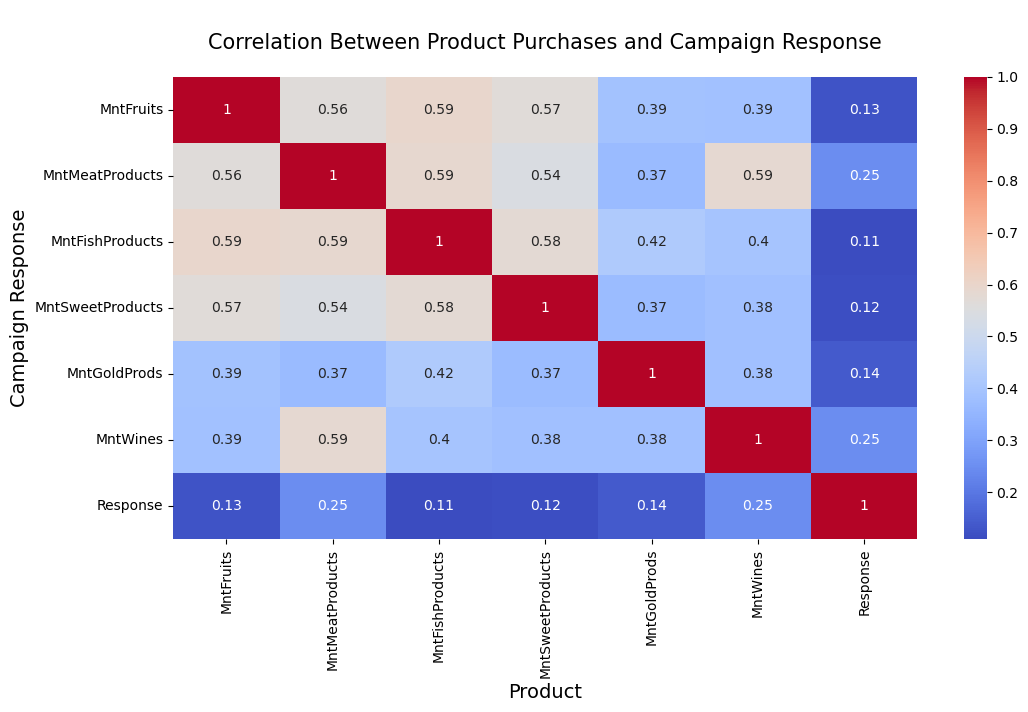

In [34]:
# Correlation between product purchases and campaign response
plt.figure(figsize=(12, 6))
product_response_corr = df_mkt[product_columns + ['Response']].corr()
sns.heatmap(product_response_corr, annot=True, cmap='coolwarm')
plt.title('\nCorrelation Between Product Purchases and Campaign Response',pad=20, fontsize=15, color='black')
plt.xlabel('Product', fontsize=14, color='black')
plt.ylabel('Campaign Response', fontsize=14, color='black')
plt.show()

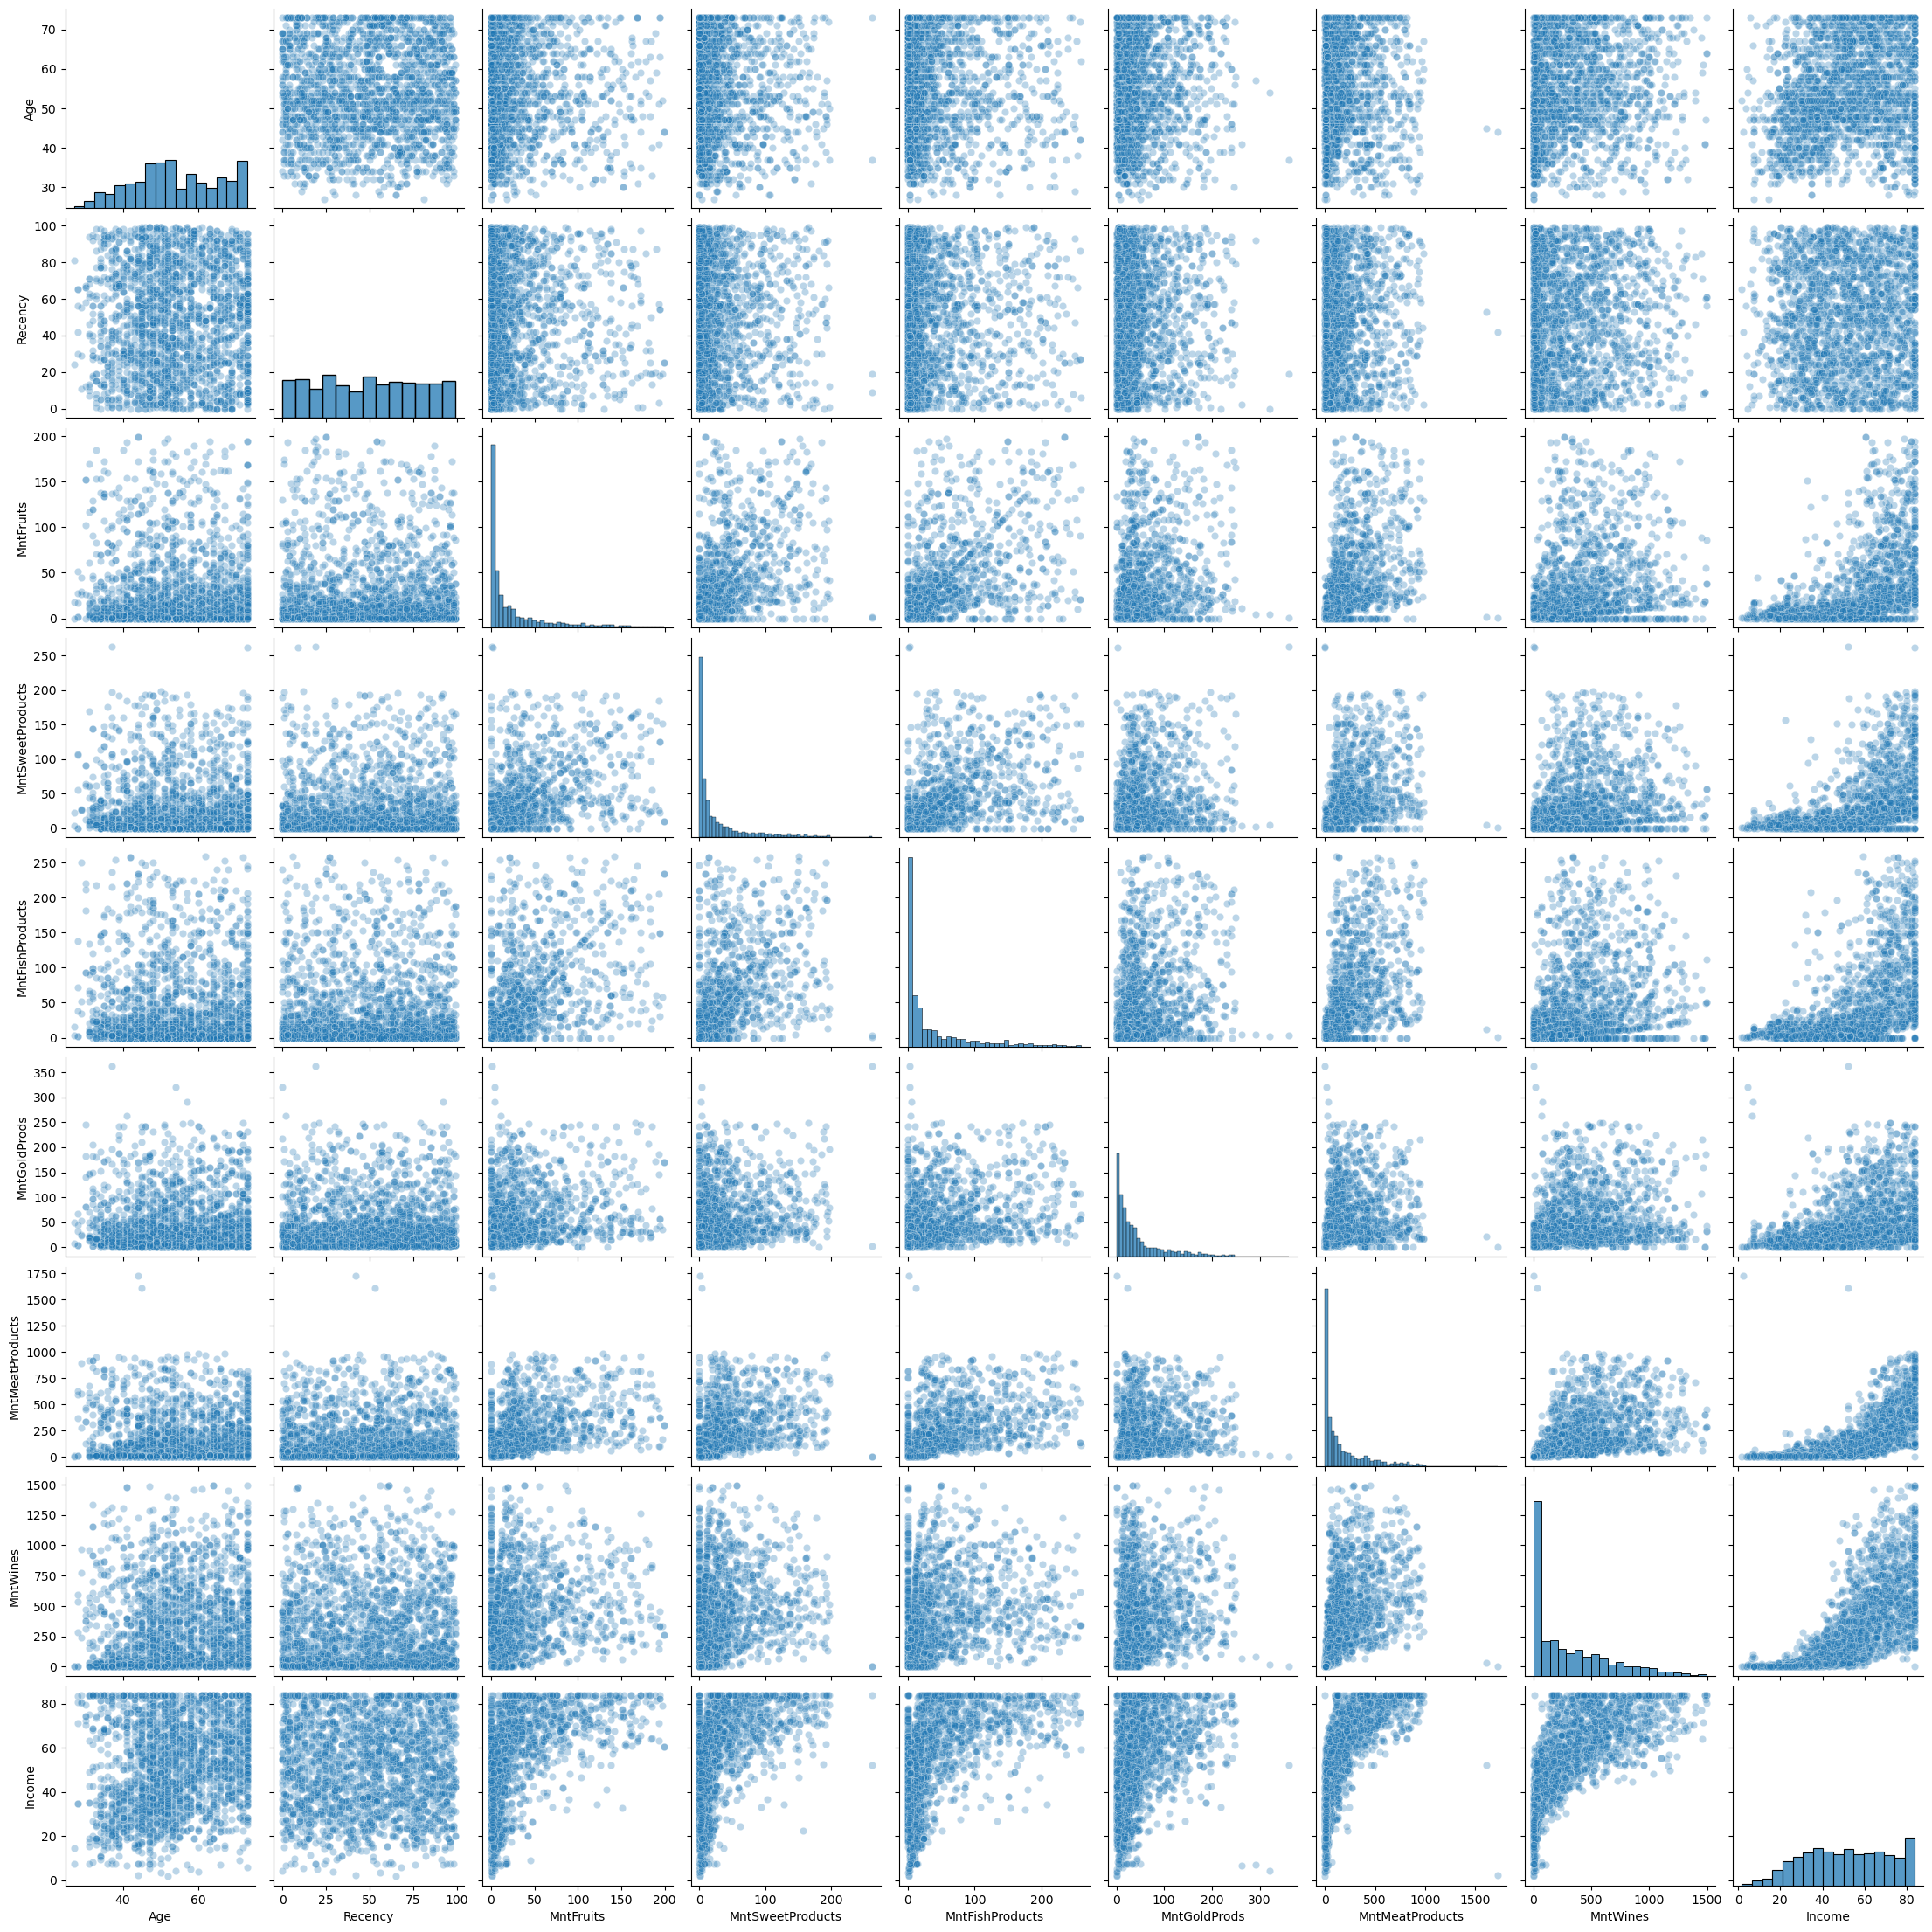

In [35]:
# Checking correlation using pairplot

NUMERICAL_FEATURES = ['Age', 'Recency', 'MntFruits', 
                      'MntSweetProducts', 'MntFishProducts', 'MntGoldProds', 
                      'MntMeatProducts', 'MntWines', 'Income']

sns.pairplot(data=df_mkt[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.3})
plt.show()

* From the plot above, we could see tha these numerical variables do not have clear linear trend between each other.
* While Income might have log relationships with these product purchasing amount (say, Mntfruit, MntSweetProducts and etc.).

Income   Kidhome  Teenhome   Recency  MntWines  \
Income               1.000000 -0.530195  0.053288  0.008762  0.728002   
Kidhome             -0.530195  1.000000 -0.036461  0.009144 -0.498230   
Teenhome             0.053288 -0.036461  1.000000  0.016246  0.003899   
Recency              0.008762  0.009144  0.016246  1.000000  0.016797   
MntWines             0.728002 -0.498230  0.003899  0.016797  1.000000   
MntFruits            0.535332 -0.373563 -0.177128 -0.003376  0.387591   
MntMeatProducts      0.688467 -0.443248 -0.267046  0.026651  0.586156   
MntFishProducts      0.550316 -0.388645 -0.205301  0.001694  0.398024   
MntSweetProducts     0.542427 -0.371720 -0.163651  0.023071  0.384885   
MntGoldProds         0.416321 -0.351059 -0.021478  0.017559  0.384979   
NumDealsPurchases   -0.122126  0.231266  0.395713 -0.002780  0.013908   
NumWebPurchases      0.493450 -0.365123  0.154624 -0.010256  0.540786   
NumCatalogPurchases  0.706914 -0.517305 -0.111976  0.030805  0.673390   
NumStorePurchases    0.690823 -0.504817  0.048310  0.001671  0.641490   
NumWebVisitsMonth   -0.643439  0.448826  0.133056 -0.020849 -0.327949   
AcceptedCmp3        -0.012531  0.014500 -0.043369 -0.033067  0.061456   
AcceptedCmp4         0.221365 -0.162170  0.038374  0.018916  0.373206   
AcceptedCmp5         0.392438 -0.205456 -0.191018  0.000942  0.471790   
AcceptedCmp1         0.327457 -0.172910 -0.140964 -0.019317  0.354069   
AcceptedCmp2         0.105472 -0.081971 -0.015885 -0.001774  0.205955   
Complain            -0.026894  0.036294  0.007442  0.005404 -0.036257   
Response             0.162924 -0.080514 -0.155726 -0.199078  0.246534   
Age                  0.216044 -0.231190  0.379857  0.019116  0.158368   
Total_Purchases      0.818041 -0.556996 -0.138790  0.022177  0.895919   

                     MntFruits  MntMeatProducts  MntFishProducts  \
Income                0.535332         0.688467         0.550316   
Kidhome              -0.373563        -0.443248        -0.388645   
Teenhome             -0.177128        -0.267046        -0.205301   
Recency              -0.003376         0.026651         0.001694   
MntWines              0.387591         0.586156         0.398024   
MntFruits             1.000000         0.562744         0.593941   
MntMeatProducts       0.562744         1.000000         0.589813   
MntFishProducts       0.593941         0.589813         1.000000   
MntSweetProducts      0.566545         0.544347         0.578983   
MntGoldProds          0.389145         0.366044         0.421147   
NumDealsPurchases    -0.133856        -0.165686        -0.141021   
NumWebPurchases       0.295507         0.315014         0.291781   
NumCatalogPurchases   0.515184         0.703668         0.564718   
NumStorePurchases     0.462344         0.509984         0.459031   
NumWebVisitsMonth    -0.424034        -0.543223        -0.452835   
AcceptedCmp3          0.014442         0.020987        -0.000243   
AcceptedCmp4          0.009850         0.108349         0.016257   
AcceptedCmp5          0.211630         0.385770         0.197715   
AcceptedCmp1          0.195001         0.321606         0.260545   
AcceptedCmp2         -0.009936         0.045283         0.002330   
Complain             -0.002988        -0.020647        -0.019039   
Response              0.125192         0.247103         0.110609   
Age                   0.008839         0.032684         0.036591   
Total_Purchases       0.615443         0.853435         0.644886   

                     MntSweetProducts  MntGoldProds  ...  NumWebVisitsMonth  \
Income                       0.542427      0.416321  ...          -0.643439   
Kidhome                     -0.371720     -0.351059  ...           0.448826   
Teenhome                    -0.163651     -0.021478  ...           0.133056   
Recency                      0.023071      0.017559  ...          -0.020849   
MntWines                     0.384885      0.384979  ...          -0.327949   
MntFruits             

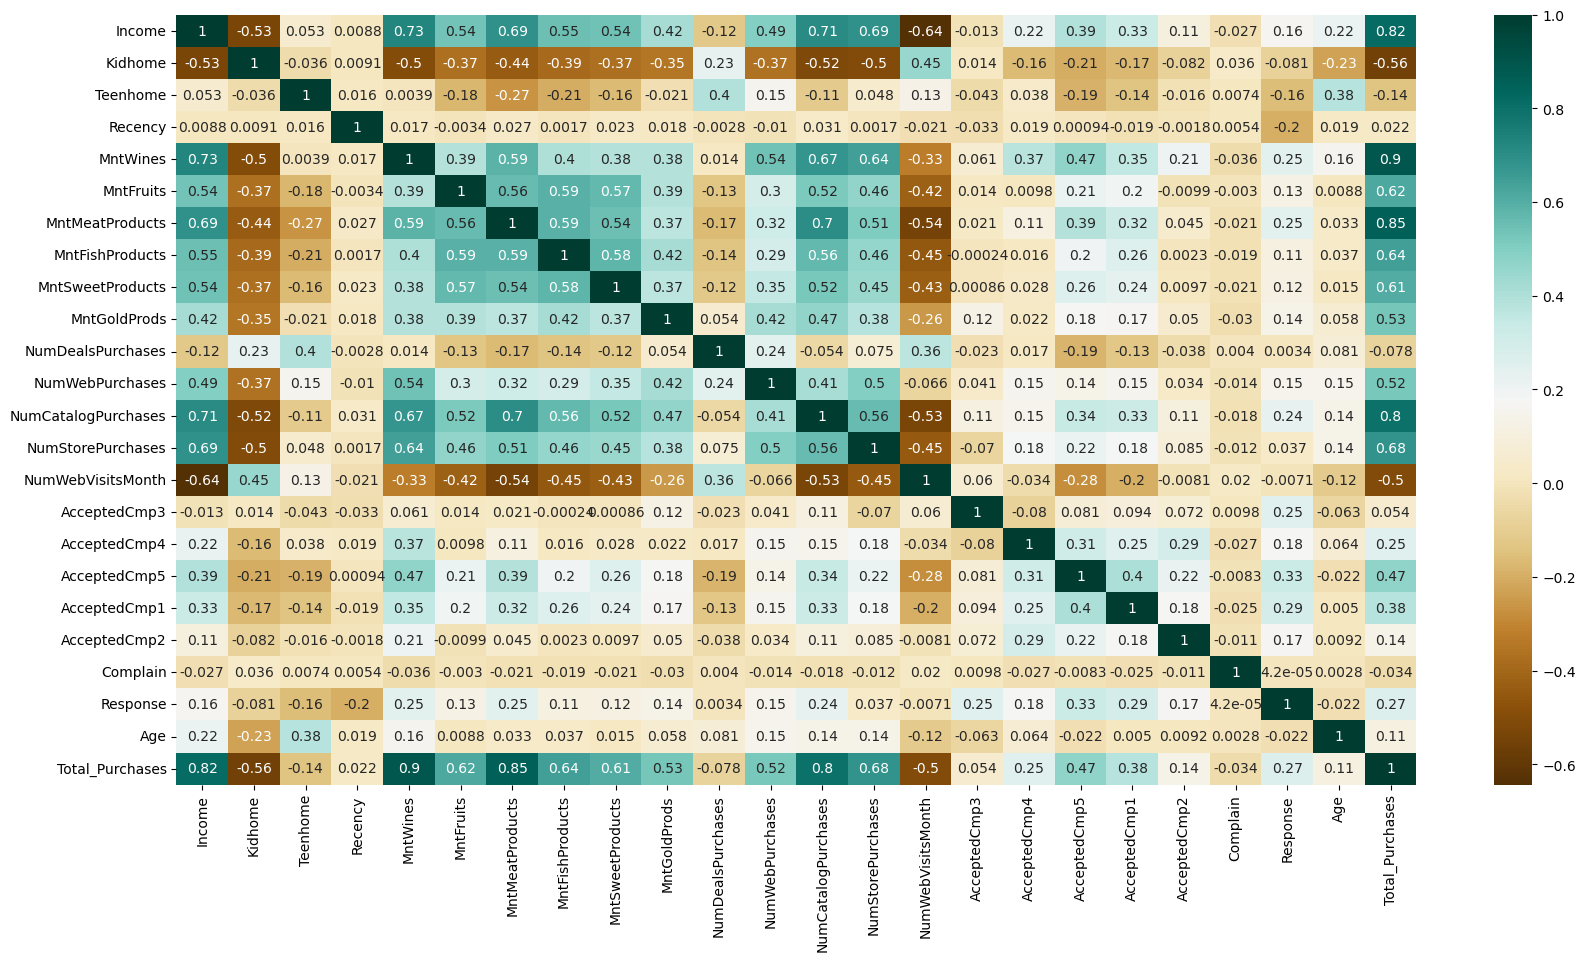

In [36]:
# Heat map among all numerical variables
plt.figure(figsize=(20,10))
c= df_mkt.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [37]:
# Model libraries
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE 

#### Before going further I will be picking the relevant data which are useful for the predication and classification models
- I will be picking relevant columns that includes;
['Recency', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Age', 'MntSweetProducts', 'AcceptedCmp5', 'NumWebVisitsMonth', 'AcceptedCmp3', 'MntFishProducts', 'MntFruits', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'Education', 'Response']

In [38]:
# New selected column
df_mkt_new = df_mkt.loc[:,['Recency', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Age', 'MntSweetProducts', 'AcceptedCmp5', 'NumWebVisitsMonth', 'AcceptedCmp3', 'MntFishProducts', 'MntFruits', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'Education', 'Response']]    


In [39]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, 
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


In [40]:
# Display the dimensions of the dataset
df_mkt_new.shape

(2229, 19)

In [41]:
# Replace categorical variables to numeric values 
# Education have orders, so we change Basic-Phd to scale 0-3
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['Basic'], 0)
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['Bachelor'], 1)
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['Master'], 2)
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['PhD'], 3)

# Change Marital_Status to dummies
df_mkt_new = pd.get_dummies(df_mkt_new, drop_first = True)
df_mkt_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Recency              2229 non-null   int64  
 1   Income               2229 non-null   float64
 2   MntWines             2229 non-null   int64  
 3   MntMeatProducts      2229 non-null   int64  
 4   MntGoldProds         2229 non-null   int64  
 5   Age                  2229 non-null   int64  
 6   MntSweetProducts     2229 non-null   int64  
 7   AcceptedCmp5         2229 non-null   int64  
 8   NumWebVisitsMonth    2229 non-null   int64  
 9   AcceptedCmp3         2229 non-null   int64  
 10  MntFishProducts      2229 non-null   int64  
 11  MntFruits            2229 non-null   int64  
 12  NumStorePurchases    2229 non-null   int64  
 13  NumCatalogPurchases  2229 non-null   int64  
 14  NumWebPurchases      2229 non-null   int64  
 15  NumDealsPurchases    2229 non-null   i

In [42]:
df_mkt_new.head(10)

Recency  Income  MntWines  MntMeatProducts  MntGoldProds  Age  \
0       58  58.138       635              546            88   66   
1       38  46.344        11                6             6   69   
2       26  71.613       426              127            42   58   
3       26  26.646        11               20             5   39   
4       94  58.293       173              118            15   42   
5       16  62.513       520               98            14   56   
6       34  55.635       235              164            27   52   
7       32  33.454        76               56            23   38   
8       19  30.351        14               24             2   49   
9       68   5.648        28                6            13   73   

   MntSweetProducts  AcceptedCmp5  NumWebVisitsMonth  AcceptedCmp3  \
0                88             0                  7             0   
1                 1             0                  5             0   
2                21             0                  4             0   
3                 3             0                  6             0   
4                27             0                  5             0   
5                42             0                  6             0   
6                49             0                  6             0   
7                 1             0                  8             0   
8                 3             0                  9             0   
9                 1             0                 20             1   

   MntFishProducts  MntFruits  NumStorePurchases  NumCatalogPurchases  \
0              172         88                  4                   10   
1                2          1                  2                    1   
2              111         49                 10                    2   
3               10          4                  4                    0   
4               46         43                  6                    3   
5                0         42                 10                    4   
6               50         65                  7                    3   
7                3         10                  4                    0   
8                3          0                  2                    0   
9                1          0                  0                    0   

   NumWebPurchases  NumDealsPurchases  AcceptedCmp1  Education  Response  
0                8                  3             0          1         1  
1                1                  2             0          1         0  
2                8                  1             0          1         0  
3                2                  2             0          1         0  
4                5                  5             0          3         0  
5                6                  2             0          2         0  
6                7                  4             0          1         0  
7                4                  2             0          3         0  
8                3                  1             0          3         1  
9                1                  1             0          3         0

#### Data Preparation for Classification Models
* Choosing our Target variable
* Test_Train Split
* Logistic Regression Model
* Random Forest
* Smote to treat imbalance dataset
* Accuracy testing

In [43]:
# Target Variable id Customer's Reponse 

# First check the unique values in the Target Variable column 

unique_values = df_mkt_new['Response'].unique()

print(unique_values)

[1 0]


In [44]:
# Value count of the Target Variable

df_mkt_new.Response.value_counts()

0    1895
1     334
Name: Response, dtype: int64

In [45]:
# Remove the Targe Variable column 
X = df_mkt_new.drop("Response", axis = 1)    # Independent variables
y = df_mkt_new.Response                    # Dependent variable

In [46]:
print(X)

      Recency  Income  MntWines  MntMeatProducts  MntGoldProds  Age  \
0          58  58.138       635              546            88   66   
1          38  46.344        11                6             6   69   
2          26  71.613       426              127            42   58   
3          26  26.646        11               20             5   39   
4          94  58.293       173              118            15   42   
...       ...     ...       ...              ...           ...  ...   
2235       46  61.223       709              182           247   56   
2236       56  64.014       406               30             8   73   
2237       91  56.981       908              217            24   42   
2238        8  69.245       428              214            61   67   
2239       40  52.869        84               61            21   69   

      MntSweetProducts  AcceptedCmp5  NumWebVisitsMonth  AcceptedCmp3  \
0                   88             0                  7             0   
1

In [47]:
y.value_counts()

0    1895
1     334
Name: Response, dtype: int64

In [48]:
#### Train_Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [49]:
# Using Smote for the imbalance class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [50]:
X_train_smote.shape

(2846, 18)

In [51]:
y_train_smote.shape

(2846,)

# Model Training

### Random Forest

In [61]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [62]:
# Define parameter grids for hyperparameter tuning
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__criterion': ['gini', 'entropy'], 
    'rf__max_features': ['auto', 'sqrt', 'log2']
}


In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [64]:
# Perform hyperparameter tuning
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters for Random Forest: {'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(criterion = gini', max_depth = 20, max_features = auto', min_samples_leaf = 1, 
                                  min_samples_split = 2, estimators = 300, random_state=42))
])

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)

In [60]:
print('Training score{}%'.format(round(clf_RF.score(X_train, y_train) * 100)))
print('Test score{}%'.format(round(clf_RF.score(X_test, y_test) * 100)))

Training score100%
Test score88%


In [61]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.88
Recall: 0.31


In [62]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.889688  0.978892  0.932161       379
           1   0.724138  0.313433  0.437500        67

    accuracy                       0.878924       446
   macro avg   0.806913  0.646162  0.684830       446
weighted avg   0.864819  0.878924  0.857851       446

[[371   8]
 [ 46  21]]


Predicted    0   1  All
Actual                 
0          371   8  379
1           46  21   67
All        417  29  446

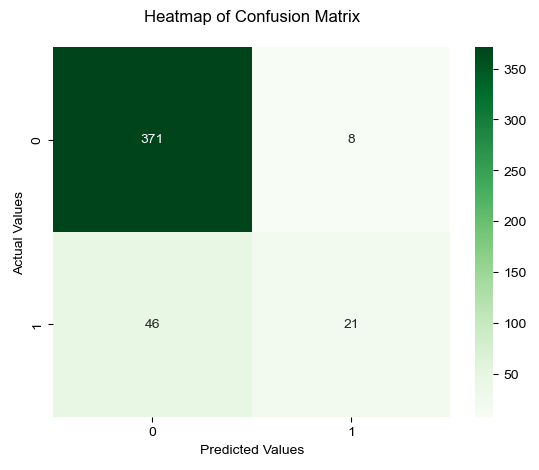

In [63]:
matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

### Smote Analysis to check for higher Recall and correct Imbalance dataset

In [84]:
# Define the desired sampling strategy ratio
sampling_strategy = 0.25

# Create the SMOTE object with the specified sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Resample the training data using SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
rf_grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters found
print("Best parameters for Random Forest:", rf_grid_search.best_params_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [86]:
# Get the best parameters found by GridSearchCV
best_rf_params = rf_grid_search.best_params_

# Create a Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_rf_params, random_state=42)

# Fit the classifier on the entire training dataset
best_rf_classifier.fit(X_train_smote, y_train_smote)

# Now, you can use this trained classifier for prediction or evaluation

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       n_estimators=200, random_state=42)

In [87]:
print('Training score{}%'.format(round(best_rf_classifier.score(X_train_smote, y_train_smote) * 100)))
print('Test score{}%'.format(round(best_rf_classifier.score(X_test, y_test) * 100)))

Training score99%
Test score89%


In [88]:
# Make predictions on the test dataset
y_pred_rf = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate recall
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall:", recall_rf)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


Accuracy: 0.8853046594982079
Recall: 0.46511627906976744
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       472
           1       0.69      0.47      0.56        86

    accuracy                           0.89       558
   macro avg       0.80      0.71      0.74       558
weighted avg       0.87      0.89      0.88       558

Confusion Matrix:
[[454  18]
 [ 46  40]]


In [68]:
# Define the Random Forest classifier with the best parameters
best_rf_params = rf_grid_search.best_params_

# Remove any prefix from the parameter names
best_rf_params_cleaned = {key.split("__")[1]: value for key, value in best_rf_params.items()}

# Create the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_rf_params_cleaned)

# Fit the classifier on the entire training dataset
best_rf_classifier.fit(X_train_smote, y_train_smote)


RandomForestClassifier(max_depth=20, n_estimators=300)

In [69]:
y_pred_sm = best_rf_classifier.predict(X_test)

In [70]:
print('Training score{}%'.format(round(best_rf_classifier.score(X_train_smote, y_train_smote) * 100)))
print('Test score{}%'.format(round(best_rf_classifier.score(X_test, y_test) * 100)))

Training score99%
Test score86%


In [71]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test,y_pred_sm)) )

recall_sm = recall_score(y_test, y_pred_sm)
print("Recall: {:.2f}".format(recall_sm))

Accuracy: 0.86
Recall: 0.62


In [72]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
   y_pred=y_pred_sm
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred_sm)
print(conf_matrix)

pd.crosstab(y_test, y_pred_sm, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.928571  0.908898  0.918630       472
           1   0.552083  0.616279  0.582418        86

    accuracy                       0.863799       558
   macro avg   0.740327  0.762589  0.750524       558
weighted avg   0.870546  0.863799  0.866812       558

[[429  43]
 [ 33  53]]


Predicted    0   1  All
Actual                 
0          429  43  472
1           33  53   86
All        462  96  558

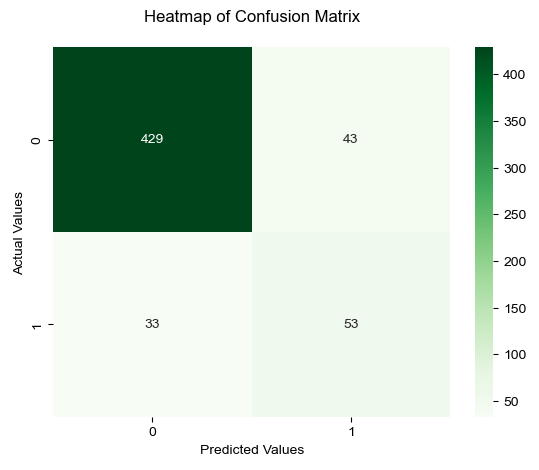

In [73]:
matrix_confusion = confusion_matrix(y_test, y_pred_sm,)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

### Decision Tree

In [74]:
# Define the desired sampling strategy ratio
sampling_strategy = 0.25

# Create the SMOTE object with the specified sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Resample the training data using SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [79]:
# Using Smote for the imbalance class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
dt_grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters found
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [81]:
from sklearn.tree import DecisionTreeClassifier

# Get the best parameters found by GridSearchCV
best_dt_params = dt_grid_search.best_params_

# Create a Decision Tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_dt_params, random_state=42)

# Train the classifier on the entire training dataset
best_dt_classifier.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(random_state=42)

In [82]:
print('Training score{}%'.format(round(best_dt_classifier.score(X_train_smote, y_train_smote) * 100)))
print('Test score{}%'.format(round(best_dt_classifier.score(X_test, y_test) * 100)))

Training score99%
Test score76%


In [83]:
# Make predictions on the test dataset
y_pred_dt = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt)
print("Recall:", recall_dt)

# Generate classification report
print(classification_report(y_test, y_pred_dt))

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)


Accuracy: 0.7634408602150538
Recall: 0.5232558139534884
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       472
           1       0.33      0.52      0.41        86

    accuracy                           0.76       558
   macro avg       0.62      0.67      0.63       558
weighted avg       0.81      0.76      0.78       558

Confusion Matrix:
[[381  91]
 [ 41  45]]


### Logistic Regression

In [112]:
# Define a pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])


In [87]:
lr_param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__max_iter': [100, 200, 300, 400]
}

In [81]:
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
lr_grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'lr__C': 0.01, 'lr__max_iter': 100}


In [83]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr',  LogisticRegression(C=0.01, max_iter=100, random_state=42))
])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create an object by calling a method LogisticRegression()
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr',  LogisticRegression(C=0.01, max_iter=100, random_state=42))
])

# Train the model by calling a fit() method
lr_pipeline.fit(X_train, y_train)

# Predict the values
y_pred = lr_pipeline.predict(X_test)

In [89]:
print('Training score{}%'.format(round(lr_pipeline.score(X_train, y_train) * 100)))
print('Test score{}%'.format(round(lr_pipeline.score(X_test, y_test) * 100)))

Training score88%
Test score87%


In [90]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Accuracy and recall based on Logistic regression on imbalanced dataset

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.87
Recall: 0.16


In [91]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.870370  0.992084  0.927250       379
           1   0.785714  0.164179  0.271605        67

    accuracy                       0.867713       446
   macro avg   0.828042  0.578132  0.599428       446
weighted avg   0.857653  0.867713  0.828756       446

[[376   3]
 [ 56  11]]


Predicted    0   1  All
Actual                 
0          376   3  379
1           56  11   67
All        432  14  446

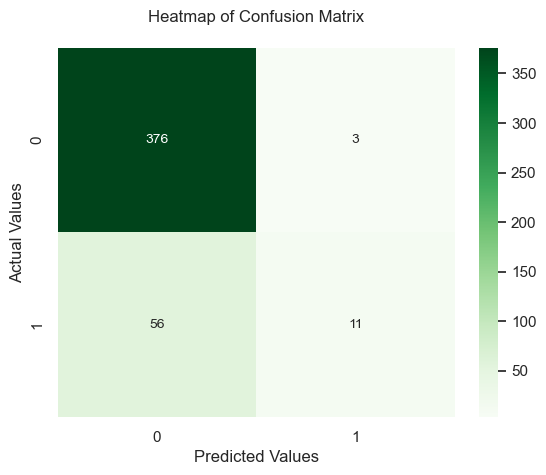

In [92]:

# Call and display confusion matrix results
matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

### Smote Analysis to check for higher Recall and correct Imbalance dataset

In [99]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [100]:
# Create an object by calling a method LogisticRegression()
sm_lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr',  LogisticRegression(C=0.01, max_iter=100, random_state=42))
])

# Train the model by calling a fit() method
sm_lr_pipeline.fit(X_train_smote,y_train_smote)

# Predict the values
y_pred_sm_lr = sm_lr_pipeline.predict(X_test)

In [101]:
print('Training score{}%'.format(round(sm_lr_pipeline.score(X_train_smote, y_train_smote) * 100)))
print('Test score{}%'.format(round(sm_lr_pipeline.score(X_test, y_test) * 100)))

Training score75%
Test score75%


In [102]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test,y_pred_sm)) )

recall_sm_lr = recall_score(y_test, y_pred_sm_lr)
print("Recall: {:.2f}".format(recall_sm_lr))

Accuracy: 0.83
Recall: 0.70


In [103]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred_sm_lr
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred_sm_lr)
print(conf_matrix)

pd.crosstab(y_test, y_pred_sm_lr, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.935065  0.759894  0.838428       379
           1   0.340580  0.701493  0.458537        67

    accuracy                       0.751121       446
   macro avg   0.637822  0.730693  0.648482       446
weighted avg   0.845759  0.751121  0.781359       446

[[288  91]
 [ 20  47]]


Predicted    0    1  All
Actual                  
0          288   91  379
1           20   47   67
All        308  138  446

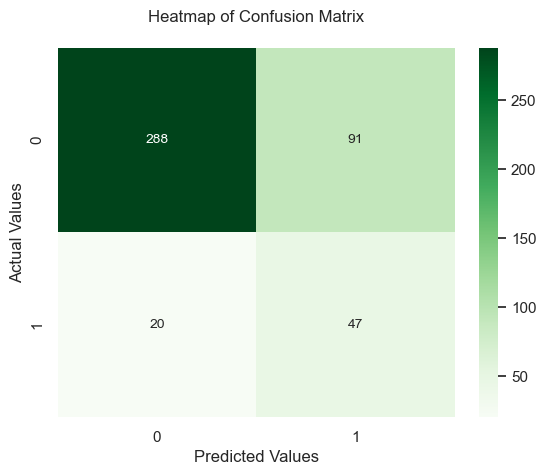

In [104]:

# Call and display confusion matrix results
matrix_confusion = confusion_matrix(y_test, y_pred_sm_lr)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

### Support Vector Machine Classification Model

In [113]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC()) 
])

In [114]:
# Define the parameter grid for hyperparameter tuning
svm_param_grid = {
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'svm__gamma': ['scale', 'auto']  
}

In [115]:
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters for SVM:", svm_grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for SVM: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Create an object by calling a method LogisticRegression()
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C = 1, gamma = 'scale', kernel = 'rbf', random_state = 42)) 
])
# Train the model by calling a fit() method
svm_pipeline.fit(X_train, y_train)

# Predict the values
y_pred = svm_pipeline.predict(X_test)

In [118]:
print('Training score{}%'.format(round(svm_pipeline.score(X_train, y_train) * 100)))
print('Test score{}%'.format(round(svm_pipeline.score(X_test, y_test) * 100)))

Training score91%
Test score87%


In [119]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.87
Recall: 0.24


In [120]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.879147  0.978892  0.926342       379
           1   0.666667  0.238806  0.351648        67

    accuracy                       0.867713       446
   macro avg   0.772907  0.608849  0.638995       446
weighted avg   0.847227  0.867713  0.840009       446

[[371   8]
 [ 51  16]]


Predicted    0   1  All
Actual                 
0          371   8  379
1           51  16   67
All        422  24  446

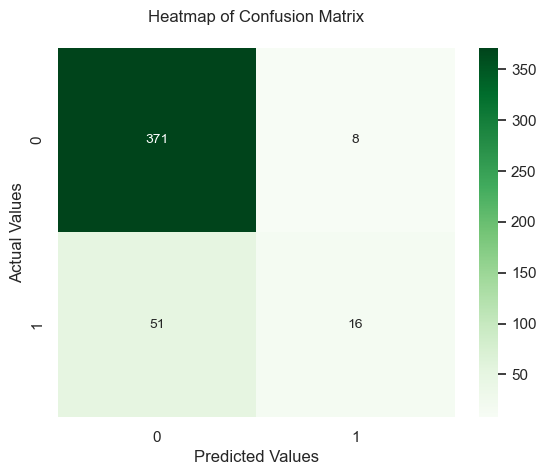

In [121]:

# Call and display confusion matrix results
matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

### Smote Analysis to check for higher Recall and correct Imbalance dataset

In [122]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [123]:
# Create an object by calling a method LogisticRegression()
svm_pipeline_sm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C = 1, gamma = 'scale', kernel = 'rbf', random_state = 42)) 
])
# Train the model by calling a fit() method
svm_pipeline_sm.fit(X_train_smote, y_train_smote)

# Predict the values
y_pred = svm_pipeline_sm.predict(X_test)

In [124]:
print('Training score{}%'.format(round(svm_pipeline_sm.score(X_train_smote, y_train_smote) * 100)))
print('Test score{}%'.format(round(svm_pipeline_sm.score(X_test, y_test) * 100)))

Training score88%
Test score77%


In [125]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.77
Recall: 0.63


In [126]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.923077  0.791557  0.852273       379
           1   0.347107  0.626866  0.446809        67

    accuracy                       0.766816       446
   macro avg   0.635092  0.709211  0.649541       446
weighted avg   0.836552  0.766816  0.791362       446

[[300  79]
 [ 25  42]]


Predicted    0    1  All
Actual                  
0          300   79  379
1           25   42   67
All        325  121  446

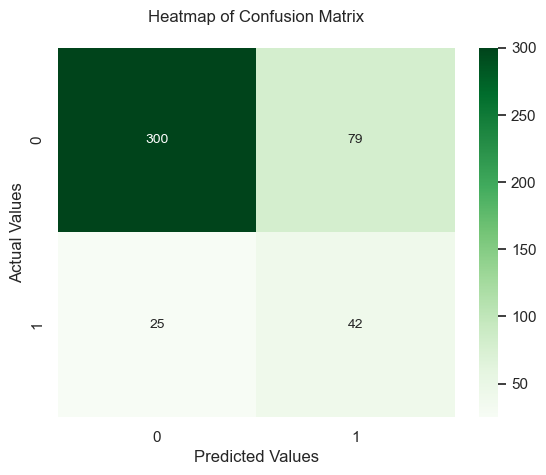

In [129]:

# Call and display confusion matrix results
matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

### Cross Validation

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [256]:
models = []
models.append(('RNF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('dt', DecisionTreeClassifier()))

In [135]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RNF: 0.881109 (0.011050)
LR: 0.855295 (0.017022)
SVM: 0.851375 (0.003722)


In [137]:
# Validation for smote analysis done
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RNF: 0.921829 (0.013634)
LR: 0.750002 (0.009234)
SVM: 0.731524 (0.016418)


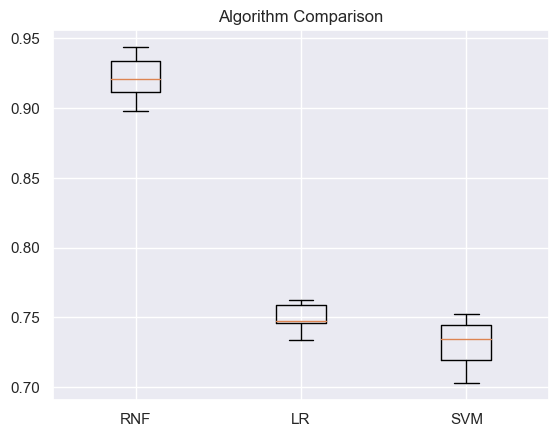

In [138]:
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [139]:
# Validation for smote analysis done
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='recall')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RNF: 0.946589 (0.015085)
LR: 0.740763 (0.017523)
SVM: 0.764439 (0.029223)


Looking at the cross validation scores for both Accuracy and Recall, the best model is the Random Forest but I want us to look at the confusion matrix to see if the classes are predicted correctly.

In [141]:
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_sm)

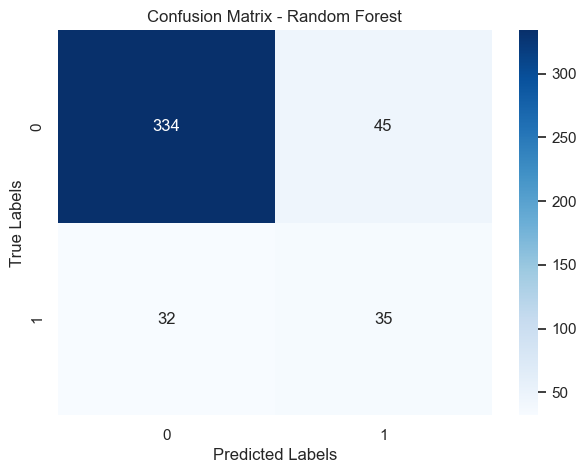

In [143]:
plt.figure(figsize=(7, 5))
ax = sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

RNF performs great and better , missing 32 out of 67 cases of response. Additionally, we find fewer false positives as well. However, there is still improvement to be made.
We will treat this cases with downsampling to handle the imbalance dataset instead of smote because before smote we can see thar RNF confusion predict better but there might be a bias due to the imbalance dataset.

### handling unbalanced data by downsampling/upsampling

In [155]:
class_names = {0: 'No Response', 1: 'Response'}
print(df_mkt_new.Response.value_counts().rename(index = class_names))


No Response    1895
Response        334
Name: Response, dtype: int64


Distribution of the Response in the subsample dataset
0    0.55574
1    0.44426
Name: Response, dtype: float64


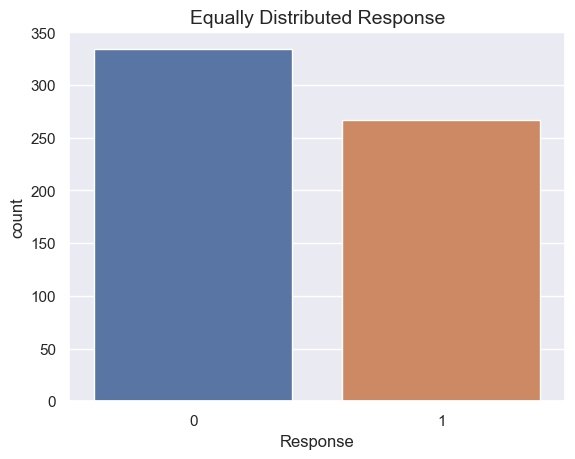

In [178]:
df = pd.concat([X_train, y_train], axis=1)
# amount of response class 334 rows.
response_df = df.loc[df['Response'] == 1]
no_response_df = df.loc[df['Response'] == 0][:334]

# shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
y_train_new = df_new["Response"]
X_train_new = df_new.loc[:, df_mkt_new.columns != 'Response']

# Let us look at the distribution of the classes in the dataset
print('Distribution of the Response in the subsample dataset')
print(df_new['Response'].value_counts() / len(df_new))
sns.countplot(x='Response', data=df_new)
pyplot.title('Equally Distributed Response', fontsize=14)
pyplot.show()

Now we have a balanced data, with close to 750 observations. We will train all the models again, We wll also do the parameter tuning using Grid Search CV.

In [179]:
# Separate features (X) and target variable (y)
X = df_new.drop(columns=['Response'])  # Features
y = df_new ['Response']  # Target variable

# Split the dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set - Features:", X_train_balanced.shape, "Labels:", y_train_balanced.shape)
print("Testing set - Features:", X_test_balanced.shape, "Labels:", y_test_balanced.shape)

Training set - Features: (480, 18) Labels: (480,)
Testing set - Features: (121, 18) Labels: (121,)


#### 1. Random Forest

In [180]:
# Define a pipeline for Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_new', RandomForestClassifier())
])

In [181]:
# Define parameter grids for hyperparameter tuning
rf_new = RandomForestClassifier(random_state=42)

rf_new_param_grid = {
    'rf_new__n_estimators': [100, 200, 300],
    'rf_new__max_depth': [None, 10, 20, 30],
    'rf_new__min_samples_split': [2, 5, 10],
    'rf_new__min_samples_leaf': [1, 2, 4],
    'rf_new__criterion': ['gini', 'entropy'], 
    'rf_new__max_features': ['auto', 'sqrt', 'log2']
}


In [182]:
# Perform hyperparameter tuning
rf_grid_searchCV = GridSearchCV(pipeline_rf, rf_new_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_searchCV.fit(X_train_balanced, y_train_balanced)

print("Best parameters for Random Forest:", rf_grid_searchCV.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters for Random Forest: {'rf_new__criterion': 'entropy', 'rf_new__max_depth': None, 'rf_new__max_features': 'sqrt', 'rf_new__min_samples_leaf': 1, 'rf_new__min_samples_split': 10, 'rf_new__n_estimators': 100}


In [215]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_new', RandomForestClassifier(criterion = 'entropy', 
                                  min_samples_split = 10, n_estimators = 100, random_state=42))
])

#Train the model using the training sets y_pred=clf.predict(X_test)
pipeline_rf.fit(X_train_balanced, y_train_balanced)

y_pred = pipeline_rf.predict(X_test_balanced)

In [221]:
print('Training score{}%'.format(round(pipeline_rf.score(X_train_balanced, y_train_balanced) * 100)))
print('Test score{}%'.format(round(pipeline_rf.score(X_test_balanced, y_test_balanced) * 100)))

Training score97%
Test score77%


In [222]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_balanced, y_pred)) )

recall = recall_score(y_test_balanced, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.77
Recall: 0.60


In [264]:
sk_report = classification_report(
    digits=6,
    y_true=y_test_balanced, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test_balanced, y_pred)
print(conf_matrix)

pd.crosstab(y_test_balanced, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.719298  0.611940  0.661290        67
           1   0.593750  0.703704  0.644068        54

    accuracy                       0.652893       121
   macro avg   0.656524  0.657822  0.652679       121
weighted avg   0.663268  0.652893  0.653604       121

[[41 26]
 [16 38]]


Predicted   0   1  All
Actual                
0          41  26   67
1          16  38   54
All        57  64  121

#### 2. Logistic Regression



In [230]:
# Define a pipeline for Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr_new', LogisticRegression())
])


In [231]:
lr_new_param_grid = {
    'lr_new__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr_new__max_iter': [100, 200, 300, 400]
}

In [232]:
lr_grid_searchCV = GridSearchCV(pipeline_lr, lr_new_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
lr_grid_searchCV.fit(X_train_balanced, y_train_balanced)

print("Best parameters for Logistic Regression:", lr_grid_searchCV.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'lr_new__C': 1, 'lr_new__max_iter': 100}


In [233]:
# Split the dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create an object by calling a method LogisticRegression()
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr_new',  LogisticRegression(C=1, max_iter=100, random_state=42))
])

# Train the model by calling a fit() method
pipeline_lr.fit(X_train_balanced, y_train_balanced)

# Predict the values
y_pred = pipeline_lr.predict(X_test_balanced)

In [234]:
print('Training score{}%'.format(round(pipeline_lr.score(X_train_balanced, y_train_balanced) * 100)))
print('Test score{}%'.format(round(pipeline_lr.score(X_test_balanced, y_test_balanced) * 100)))

Training score80%
Test score78%


In [235]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_balanced, y_pred)) )

recall = recall_score(y_test_balanced, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.78
Recall: 0.69


In [236]:
sk_report = classification_report(
    digits=6,
    y_true=y_test_balanced, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test_balanced, y_pred)
print(conf_matrix)

pd.crosstab(y_test_balanced, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.770270  0.850746  0.808511        67
           1   0.787234  0.685185  0.732673        54

    accuracy                       0.776860       121
   macro avg   0.778752  0.767966  0.770592       121
weighted avg   0.777841  0.776860  0.774666       121

[[57 10]
 [17 37]]


Predicted   0   1  All
Actual                
0          57  10   67
1          17  37   54
All        74  47  121

#### 3. Support Vector Machine Classification Model

In [237]:
# Define a pipeline for SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM_new', SVC())
])


In [240]:
SVM_new_param_grid = {
        'SVM_new__C': [0.1, 1, 10],
        'SVM_new__gamma': ['scale', 'auto'],
        'SVM_new__kernel': ['linear', 'rbf', 'sigmoid', 'poly']
    }


In [241]:
svm_grid_searchCV = GridSearchCV(pipeline_svm, SVM_new_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
svm_grid_searchCV.fit(X_train_balanced, y_train_balanced)

print("Best parameters for Logistic Regression:", svm_grid_searchCV.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'SVM_new__C': 10, 'SVM_new__gamma': 'scale', 'SVM_new__kernel': 'linear'}


In [242]:
# Create an object by calling a method LogisticRegression()
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM_new', SVC(C = 10, gamma = 'scale', kernel = 'linear', random_state = 42)) 
])
# Train the model by calling a fit() method
pipeline_svm.fit(X_train_balanced, y_train_balanced)

# Predict the values
y_pred = pipeline_svm.predict(X_test_balanced)

In [243]:
print('Training score{}%'.format(round(pipeline_svm.score(X_train_balanced, y_train_balanced) * 100)))
print('Test score{}%'.format(round(pipeline_svm.score(X_test_balanced, y_test_balanced) * 100)))

Training score80%
Test score75%


In [244]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_balanced, y_pred)) )

recall = recall_score(y_test_balanced, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.75
Recall: 0.67


In [245]:
sk_report = classification_report(
    digits=6,
    y_true=y_test_balanced, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test_balanced, y_pred)
print(conf_matrix)

pd.crosstab(y_test_balanced, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.753425  0.820896  0.785714        67
           1   0.750000  0.666667  0.705882        54

    accuracy                       0.752066       121
   macro avg   0.751712  0.743781  0.745798       121
weighted avg   0.751896  0.752066  0.750087       121

[[55 12]
 [18 36]]


Predicted   0   1  All
Actual                
0          55  12   67
1          18  36   54
All        73  48  121

#### 4. Decision Tree

In [247]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
# Define a pipeline for Decision Tree
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])


In [249]:
# Define parameter grids for Decision Tree
dt_param_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

In [250]:
# Perform hyperparameter tuning for Decision Tree
dt_grid_searchCV = GridSearchCV(pipeline_dt, dt_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
dt_grid_searchCV.fit(X_train_balanced, y_train_balanced)
print("Best parameters for Decision Tree:", dt_grid_searchCV.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}


In [252]:
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 2,
                                 min_samples_split = 2, random_state = 42)) 
])
# Train the model by calling a fit() method
pipeline_dt.fit(X_train_balanced, y_train_balanced)

# Predict the values
y_pred = pipeline_dt.predict(X_test_balanced)

In [253]:
print('Training score{}%'.format(round(pipeline_dt.score(X_train_balanced, y_train_balanced) * 100)))
print('Test score{}%'.format(round(pipeline_dt.score(X_test_balanced, y_test_balanced) * 100)))

Training score92%
Test score65%


In [254]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_balanced, y_pred)) )

recall = recall_score(y_test_balanced, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.65
Recall: 0.70


In [255]:
sk_report = classification_report(
    digits=6,
    y_true=y_test_balanced, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test_balanced, y_pred)
print(conf_matrix)

pd.crosstab(y_test_balanced, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.719298  0.611940  0.661290        67
           1   0.593750  0.703704  0.644068        54

    accuracy                       0.652893       121
   macro avg   0.656524  0.657822  0.652679       121
weighted avg   0.663268  0.652893  0.653604       121

[[41 26]
 [16 38]]


Predicted   0   1  All
Actual                
0          41  26   67
1          16  38   54
All        57  64  121

#### Cross Validation of balanced under sampled data

In [260]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RNF: 0.881106 (0.012673)
LR: 0.855295 (0.017022)
SVM: 0.851375 (0.003722)
dt: 0.832854 (0.022657)


In [258]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RNF: 0.348718 (0.081199)
LR: 0.221083 (0.082535)
SVM: 0.033903 (0.026427)
dt: 0.475214 (0.102364)


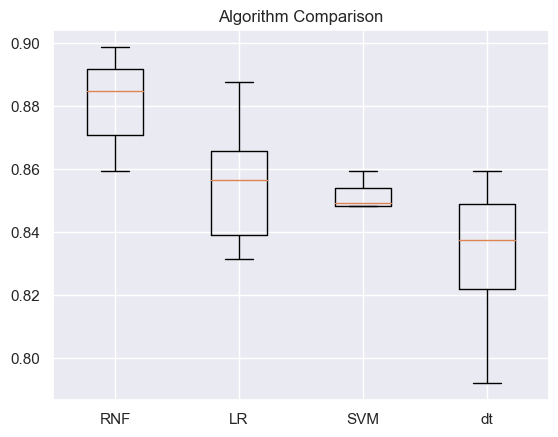

In [261]:
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [262]:
# Compute confusion matrix
conf_matrix_ = confusion_matrix(y_test_balanced, y_pred)

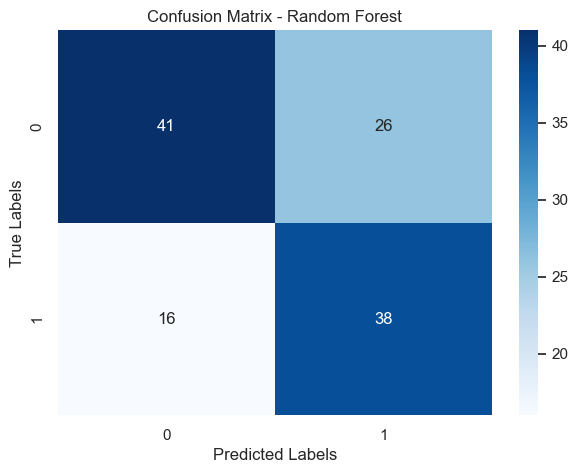

In [263]:
plt.figure(figsize=(7, 5))
ax = sns.heatmap(conf_matrix_, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

## Conclusion
* In this report, I have focused on  analyzing the marketing response dataset of customers after marketing campaigns were carried out. The project successfully applied project management methodology to analyze a marketing campaign dataset. Key findings included the effectiveness of SMOTE in addressing imbalanced data and the superior performance of the Random Forest model over Logistic Regression. The insights gained can guide future marketing strategies to target potential customers more effectively. Using the Random Forrest classifier, I have been able to predict with 88% accuracy that customers are likely to response to the marketing campaigns in future but however, I am now entering the evaluation stage of the CRISP DM model which means we may have to re-visit some of the earlier steps to obtain confidence in our predictions.

## References
* Kenan Guan .(2021) ‘Customer_Response_Predict & Personality_Analysis’  Available at: https://www.kaggle.com/code/cainanguan/customer-response-predict-   personality-analysis
(Accessed: 10 December 2023)

* Menduni, G., Zifarelli, A., Sampaolo, A., Patimisco, P., Giglio, M., Amoroso, N., Wu, H., Dong, L.,   
                   Bellotti, R. and Spagnolo, V., 2022. High-concentration methane and ethane 
                   QEPAS detection employing partial least squares regression to filter out energy    
                    relaxation dependence on gas matrix composition. Photoacoustics, 26, p.100349.  

* Geron, A.(2019) Hands-n Machine Learning with Scikit-Learn,Keras and TensorFlow,
                  United State of America: O’Reilly Media, Inc.
              
